<a href="https://colab.research.google.com/github/m-dergacheva/Yandex-Practicum_DA/blob/main/Yandex_%D0%90%D0%BD%D0%B0%D0%BB%D0%B8%D0%B7_%D1%80%D1%8B%D0%BD%D0%BA%D0%B0_%D0%BD%D0%B5%D0%B4%D0%B2%D0%B8%D0%B6%D0%B8%D0%BC%D0%BE%D1%81%D1%82%D0%B8.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Исследование объявлений о продаже квартир

В вашем распоряжении данные сервиса Яндекс.Недвижимость — архив объявлений о продаже квартир в Санкт-Петербурге и соседних населённых пунктов за несколько лет. Нужно научиться определять рыночную стоимость объектов недвижимости. Ваша задача — установить параметры. Это позволит построить автоматизированную систему: она отследит аномалии и мошенническую деятельность.

По каждой квартире на продажу доступны два вида данных. Первые вписаны пользователем, вторые — получены автоматически на основе картографических данных. Например, расстояние до центра, аэропорта, ближайшего парка и водоёма.

**Цель**: определить набор параметров имеющие связь/влияние на определение рыночной стоимости недвижимости (какие параметры реально коррелируют с параметром стоимости)  
**Задачи**:
1. Подготовить данные, проанализировать на предмет пропусков (определить, какие данные нужны - заполнить пропуски, какие данные могут не понадобится -пропуски можно оставить, либо, если пропусков много-данные удалить).
2. Определить, сколько обычно занимает продажа. Какие продажи можно считать быстрыми, а какие — необычно долгими?"
3. Определить какие факторы больше всего влияют на общую (полную) стоимость объекта? Постройте графики, которые покажут зависимость цены от указанных ниже параметров. Для подготовки данных перед визуализацией вы можете использовать сводные таблицы.
4. Посчитайте среднюю цену одного квадратного метра в 10 населённых пунктах с наибольшим числом объявлений. Выделите населённые пункты с самой высокой и низкой стоимостью квадратного метра. Эти данные можно найти по имени в столбце locality_name.
5. Выделить квартиры в Санкт-Петербурге с помощью столбца locality_name и вычислите среднюю цену каждого километра. Опишите, как стоимость объектов зависит от расстояния до центра города.

### Откройте файл с данными и изучите общую информацию.

In [3]:
# импорт необходимых библиотек
import warnings
warnings.filterwarnings('ignore')
import pandas as pd
import matplotlib.pyplot as plt

# из библиотеки google.colab импортируем класс files
from google.colab import files
# создаем объект этого класса, применяем метод .upload()
uploaded = files.upload()

Saving real_estate_data (1).csv to real_estate_data (1).csv


In [7]:
# загрузка и открытие файла
data=pd.read_csv('/content/real_estate_data.csv', sep='\t')
print(data.info())
print(data.isna().sum())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15664 entries, 0 to 15663
Data columns (total 22 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   total_images          15664 non-null  int64  
 1   last_price            15664 non-null  float64
 2   total_area            15664 non-null  float64
 3   first_day_exposition  15664 non-null  object 
 4   rooms                 15664 non-null  int64  
 5   ceiling_height        9616 non-null   float64
 6   floors_total          15604 non-null  float64
 7   living_area           14398 non-null  float64
 8   floor                 15664 non-null  int64  
 9   is_apartment          1812 non-null   object 
 10  studio                15664 non-null  bool   
 11  open_plan             15664 non-null  bool   
 12  kitchen_area          14156 non-null  float64
 13  balcony               8020 non-null   float64
 14  locality_name         15627 non-null  object 
 15  airports_nearest   

In [ ]:
# отображение первых строк
display(data.head())

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,kitchen_area,balcony,locality_name,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition
0,20,13000000.0,108.0,2019-03-07T00:00:00,3,2.70,16.0,51.0,8,NaN,...,25.0,NaN,Санкт-Петербург,18863.0,16028.0,1.0,482.0,2.0,755.0,NaN
1,7,3350000.0,40.4,2018-12-04T00:00:00,1,NaN,11.0,18.6,1,NaN,...,11.0,2.0,посёлок Шушары,12817.0,18603.0,0.0,NaN,0.0,NaN,81.0
2,10,5196000.0,56.0,2015-08-20T00:00:00,2,NaN,5.0,34.3,4,NaN,...,8.3,0.0,Санкт-Петербург,21741.0,13933.0,1.0,90.0,2.0,574.0,558.0
3,0,64900000.0,159.0,2015-07-24T00:00:00,3,NaN,14.0,NaN,9,NaN,...,NaN,0.0,Санкт-Петербург,28098.0,6800.0,2.0,84.0,3.0,234.0,424.0
4,2,10000000.0,100.0,2018-06-19T00:00:00,2,3.03,14.0,32.0,13,NaN,...,41.0,NaN,Санкт-Петербург,31856.0,8098.0,2.0,112.0,1.0,48.0,121.0


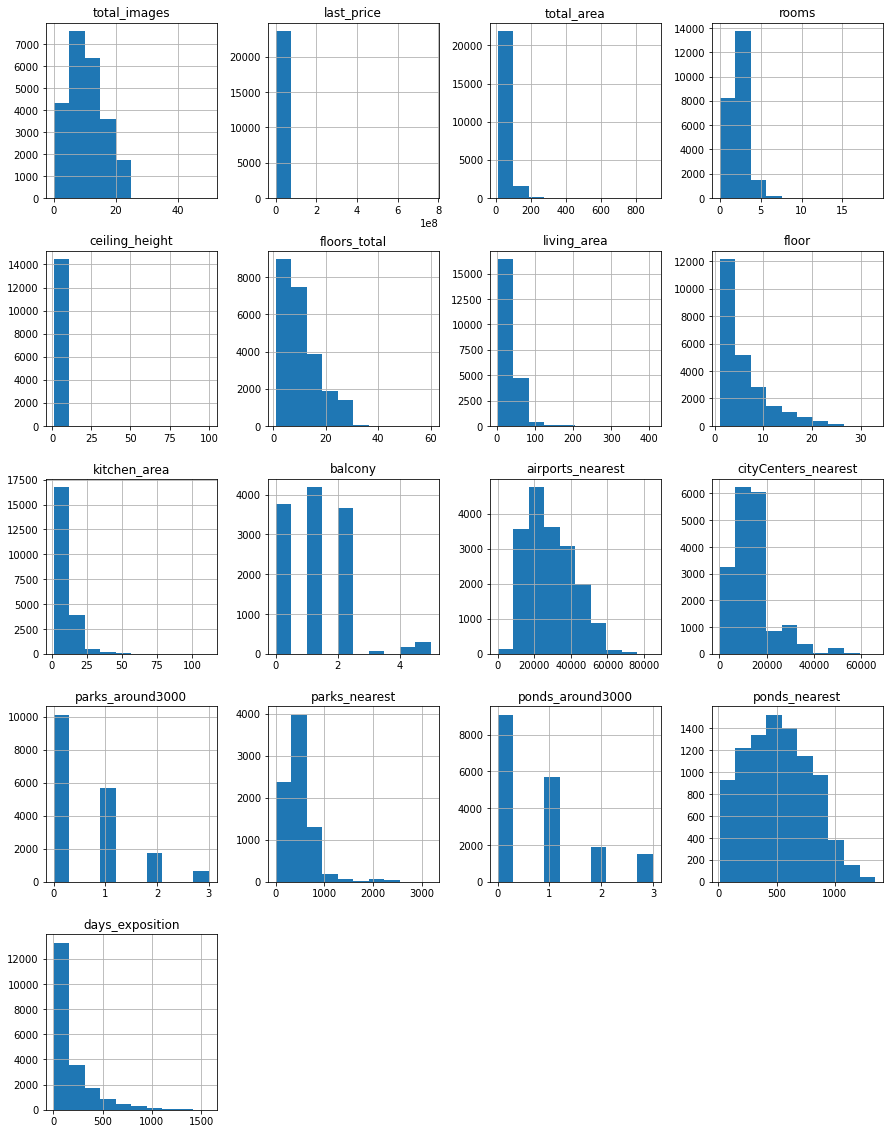

In [ ]:
# графическая иллюстрация данных в сете
data.hist(figsize=(15,20))
plt.show()

In [ ]:
#для предварительного анализа данных, предлагается оценить какие данные имеют/не имеют связь друг с другом
display(data.corr())

,total_images,last_price,total_area,rooms,ceiling_height,floors_total,living_area,floor,studio,open_plan,kitchen_area,balcony,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition
total_images,1.000000,0.104473,0.115352,0.099288,-0.001987,0.010427,0.104780,0.031340,-0.029303,-0.024407,0.104756,0.121693,-0.002298,-0.047666,0.021120,-0.008347,-0.011553,-0.003034,-0.026657
last_price,0.104473,1.000000,0.653675,0.363343,0.085430,-0.006984,0.566492,0.026576,-0.025362,-0.008802,0.519869,0.029646,-0.026239,-0.206747,0.151058,-0.016414,0.159996,-0.084809,0.081146
total_area,0.115352,0.653675,1.000000,0.758344,0.095490,-0.075774,0.939537,-0.024754,-0.072653,-0.034885,0.609121,0.047937,-0.030753,-0.231446,0.164689,-0.021497,0.162346,-0.097969,0.149675
rooms,0.099288,0.363343,0.758344,1.000000,0.054457,-0.228215,0.845977,-0.150862,-0.147286,-0.087500,0.269945,0.017991,-0.061199,-0.184864,0.137257,-0.054549,0.092693,-0.057689,0.126961
ceiling_height,-0.001987,0.085430,0.095490,0.054457,1.000000,-0.028732,0.090650,-0.011798,0.001674,0.042777,0.087641,0.040523,-0.023947,-0.091689,0.065915,-0.019167,0.078209,-0.059090,0.019091
floors_total,0.010427,-0.006984,-0.075774,-0.228215,-0.028732,1.000000,-0.169311,0.678059,0.070151,0.050791,0.163944,0.194065,0.108288,0.019774,-0.252833,0.097527,-0.122735,0.038864,-0.052234
living_area,0.104780,0.566492,0.939537,0.845977,0.090650,-0.169311,1.000000,-0.097210,-0.056231,-0.033711,0.428674,0.018849,-0.057912,-0.231368,0.184453,-0.050167,0.148933,-0.081674,0.142454
floor,0.031340,0.026576,-0.024754,-0.150862,-0.011798,0.678059,-0.097210,1.000000,0.036940,0.035824,0.135531,0.168773,0.071597,0.009084,-0.163784,0.073045,-0.076312,0.024850,-0.039463
studio,-0.029303,-0.025362,-0.072653,-0.147286,0.001674,0.070151,-0.056231,0.036940,1.000000,-0.004235,NaN,0.031455,-0.021876,-0.007029,-0.030202,0.009134,0.000939,0.002606,-0.022476
open_plan,-0.024407,-0.008802,-0.034885,-0.087500,0.042777,0.050791,-0.033711,0.035824,-0.004235,1.000000,NaN,0.019491,-0.013583,-0.004204,-0.010077,0.010612,0.008455,-0.003328,-0.024112


**Вывод** в исходных данных обнаружены пропуски в ceiling_height высота потолков (м), floors_total (всего этажей в доме), living_area (жилая площадь в квадратных метрах (м²)), is_apartment (апартаменты ли) , kitchen_area (площадь кухни в квадратных метрах (м²)) , balcony (кол-во балконов), locality_name (наименование города/поселения и т.д. нахождения квартиры) , airports_nearest (расстояние до ближайшего аэропорта в метрах (м)), cityCenters_nearest (расстояние до центра города), parks_around3000 (число парков в радиусе 3 км) , parks_nearest (расстояние до ближайшего парка) , ponds_around3000 (число водоёмов в радиусе 3 км) , ponds_nearest (расстояние до ближайшего пруда), days_exposition (сколько дней было размещено объявление (от публикации до снятия)).
Пропуски в ceiling_height могли быть по причине незаполнения данных пользователем (например, эта информация не обязательна к размещению) или по причине технической ошибки. При этом, пропусков много и удалять такое кол-во данных - потерять чуть менее половины data. Пропуски можно заполнить на основе локации (как правило в городах строят однотипные дома, в которых одиннаковые\максимально приближенные параметры)
Пропуски в floors_total могут быть обусловлены либо человеческим фактором (например, эта информация не обязательна к размещению), либо дом частный и информация не была указана осознанно (дом частный с 1 этажом), либо техническая ошибка. Возможно заполнить данные медианными значениями по data (в основном анализируются города с многоэтажными домами). При этом, кол-во пропусков не так много, и в общем случае можно избавится от данных с этими пропусками.
Пропуски в living_area явно были утеряны по причине технического характера (маловероятно, что эта информация не была обязательна к заполнению). Такую информацию можно заполнить по кол-ву комнат (логично, что чем больше площадь - тем больше комнат). Данных пропусков немного, но, т.к. данные параметр один из важных (в целом изучение стоимости квартиры предположительно напрямую зависит от кв.м.), удалять такие строки непредпочтительно.
Пропуски в is_apartment возникли явно по причине того, что при заполнении информации пользователем недвижимость не являлась апартаментами, и данную информацию просто пропустили. Предлагается заполнить пропуски значением False (так как использовались булевые значения т.е. либо True либо False). Удалять такие данные с пропусками нельзя, т.к. это почти весь data.
В части kitchen_area - ситуация аналогична с living_area и ее предлагается заполнить по такому же принципу.
В части пропусков с balcony ситуация аналогична с is_apartment. Данные пропуски предлагается заполнить значением 0, т.к. если значения не указаны - значит балконов нет. Удалять данные также нельзя - это почти половина data.
Пропуски с locality_name маловероятно получится восстановить. От этих данных можно избавится, так как их крайне мало относительно всего data.
Данные по airports_nearest (расстояние до ближайшего аэропорта в метрах (м)), cityCenters_nearest (расстояние до центра города), parks_around3000 (число парков в радиусе 3 км) , parks_nearest (расстояние до ближайшего парка) , ponds_around3000 (число водоёмов в радиусе 3 км) , ponds_nearest (расстояние до ближайшего пруда), можно частично заполнить. Например, если не указана значение по ponds_around3000 (указано 0), то и parks_nearest можно присвоить значение 0 (парков нет рядом в целом). Такие данные явно не обязательны к заполнению пользователем. Было бы логичнее, чтобы такие данные "подтягивались" в зависимоти от адреса недвижимости автоматически( но это не является предметом этого исследования).
Данные по days_exposition (сколько дней было размещено объявление (от публикации до снятия)) маловероятно можно заполнить. В разных ситуациях по разному продавались квартиры (в целом, недвижимость разная, ситуации разные, описание разное). Заполнять такую информацию медианной или средней заполнять представляется нецелесообразным.

Помимо прочего, данные по first_day_exposition можно преобразовать в тип datetime, а данные по floors_total и floor - в значения int. При этом, данные в которых явно могут быть значения int (days_exposition) преобразовать в этот тип преобращовать невозможно, так как в данном столбце есть пропуски Nan (которые имеют тип float).
Причины по которым данные были изначально записаны в "странных" типах, могут быть либо технические (форма сама предполагает запись не 5 а 5.0). В части записи даты - вероятно технически не была предусмотрена форма, которая интерпретировала введенные значения в формате datetime, а записывала как в формате str.

### Предобработка данных

In [ ]:
# вывод кол-ва пропущенных значений по столбцам
print(data.isna().sum())

total_images                0
last_price                  0
total_area                  0
first_day_exposition        0
rooms                       0
ceiling_height           9195
floors_total               86
living_area              1903
floor                       0
is_apartment            20924
studio                      0
open_plan                   0
kitchen_area             2278
balcony                 11519
locality_name              49
airports_nearest         5542
cityCenters_nearest      5519
parks_around3000         5518
parks_nearest           15620
ponds_around3000         5518
ponds_nearest           14589
days_exposition          3181
dtype: int64


Пропуски обнаружены в ceiling_height высота потолков (м), floors_total (всего этажей в доме), living_area (жилая площадь в квадратных метрах (м²)), is_apartment (апартаменты ли) , kitchen_area (площадь кухни в квадратных метрах (м²)) , balcony (кол-во балконов), locality_name (наименование города/поселения и т.д. нахождения квартиры) , airports_nearest (расстояние до ближайшего аэропорта в метрах (м)), cityCenters_nearest (расстояние до центра города), parks_around3000 (число парков в радиусе 3 км) , parks_nearest (расстояние до ближайшего парка) , ponds_around3000 (число водоёмов в радиусе 3 км) , ponds_nearest (расстояние до ближайшего пруда), days_exposition (сколько дней было размещено объявление (от публикации до снятия))

In [ ]:
#пропуски в 'floors_total' предлагается заполнить медианными значением.
#исходя из графика, этажность дома редко превышает значения 20 этажей и в общем случае составляет 9-10 этажей, что соответствует медианному значению
# при этом, при анализе пик находится на значениях от 0 до 5 этажей, но в выгрузке явно будут и частные дома.
#более того, исходя из данных корреляции нет никакой взаимосвязи 'floors_total' с каким либо значением из других столбцов
#которые можно было бы аргументированно подтвердить (например, можно увидеть, что показатель floors_total имеет прямую связь с floor),
# но это мб связано с тем, что большинство квартир сдается/продается на этажах с 1 по 5.

data['floors_total']=data.loc[:,'floors_total'].fillna(data['floors_total'].median())
print('Вывод уникальных значений в столбце:',data['floors_total'].unique()) # вывод уникальных значений в столбце
print()
print('Вывод кол-ва пропусков:',data['floors_total'].isna().sum()) # вывод кол-ва отсутствующих значений (проверка)

Вывод уникальных значений в столбце: [16. 11.  5. 14. 12. 26. 24. 27.  9.  6. 17. 25.  3. 23. 19. 18.  4. 22.
  8.  2. 10.  7. 13. 15. 20. 28. 36. 21. 35. 34. 60.  1. 29. 33. 52. 37.]

Вывод кол-ва пропусков: 0


In [ ]:
# выявление количества случаев превышения указанного этажа максимального значения этажности
print((data['floors_total']<data['floor']).sum())

37


In [ ]:
#пропуски в ceiling_height предлагается заполнить медианным значением.
# исходя из данных у этого показателя нет взаимосвязи с другими техническими характеристиками недвижимости
print('Вывод медианного значения показателя высоты потолков:',data['ceiling_height'].median())
#более того, медианное значение по данному показателю соответствует стандартному параметру высоты потолков
data['ceiling_height']=data.loc[:,'ceiling_height'].fillna(data['ceiling_height'].median())
print('Вывод кол-ва пропусков:',data['ceiling_height'].isna().sum()) # вывод кол-ва пропусков (проверка)

Вывод медианного значения показателя высоты потолков: 2.65
Вывод кол-ва пропусков: 0


In [ ]:
#пропуски в living_area предлагается заполнить исходя из значений rooms.
# дополнительно иллюстрируем медианные значения жилой прощади в зависимости от кол-ва комнат:
print('Вывод медианных значений жилой зоны в зависимости от кол-ва комнат:', data.groupby('rooms')['living_area'].median())
#исходя из данных, показатель living_area имеет прямую связь с значением rooms
#(в целом, очевидно, что чем больше комнат - тем больше жилой зоны)

for i in data['rooms'].unique():
    data.loc[(data['rooms']==i) & (data['living_area'].isna()), 'living_area']= \
data.loc[data['rooms']==i,'living_area'].median()

print()
print('Вывод кол-ва пропусков:', data['living_area'].isna().sum() ) # проверка результатов отсутсвия пропусков

Вывод медианных значений жилой зоны в зависимости от кол-ва комнат: rooms
0      18.000
1      17.600
2      30.500
3      45.000
4      63.600
5      91.785
6     123.900
7     145.000
8     161.000
9     179.200
10    161.400
11    133.900
12    409.700
14    195.150
15    409.000
16    180.000
19    264.500
Name: living_area, dtype: float64

Вывод кол-ва пропусков: 0


In [ ]:
#пропуски в столбце kitchen_area предлагается заполнить в зависимости от rooms аналогично living_area

for i in data['rooms'].unique():
    data.loc[(data['rooms']==i)& (data['kitchen_area'].isna()), 'kitchen_area']= \
data.loc[data['rooms']==i,'kitchen_area'].median()

#для остальных значений, для которых не обнаружена "пара" с кол-вом комнат, заполним медианным значением площади кухни
data['kitchen_area']=data['kitchen_area'].fillna(data['kitchen_area'].median())

print('Вывод медианных значений площади кухни в зависимости от кол-ва комнат:',data.groupby('rooms')['kitchen_area'].median())
print()
print('Вывод кол-ва пропусков:',data['kitchen_area'].isna().sum())

Вывод медианных значений площади кухни в зависимости от кол-ва комнат: rooms
0       9.04
1       9.04
2       8.80
3       9.50
4      11.10
5      15.10
6      19.50
7      20.00
8      25.00
9      14.30
10     19.80
11     12.60
12    112.00
14     21.25
15    100.00
16     13.00
19     27.60
Name: kitchen_area, dtype: float64

Вывод кол-ва пропусков: 0


In [ ]:
#предполается, что пустые значения в balcony обусловлены отсуствием балконов в принципе
#пропуски в данном столбце можно заполнить значением 0
data['balcony']=data['balcony'].fillna(0)
print('Вывод кол-ва пропусков:',data['balcony'].isna().sum())

Вывод кол-ва пропусков: 0


In [ ]:
#уменьшить кол-во пропусков в столбце parks_nearest.
#Предполагается, что если в parks_around3000 указано 0, то parks_nearest также будет равен 0
data.loc[data['parks_around3000']==0,'parks_nearest'] = 0

#аналогично для ponds_around3000  и ponds_nearest
data.loc[data['ponds_around3000']==0,'ponds_nearest'] = 0

In [ ]:
#предлагается заполнить отсутсвующие значения в is_apartment на значения False.
#наиболее вероятно, если бы недвижимость является апартаментами, то данную инофрмацию указывали явно,
#в противном случае - данные не указывали
data['is_apartment']=data['is_apartment'].fillna(False)
print('Вывод кол-ва пропусков:',data['is_apartment'].isna().sum())

Вывод кол-ва пропусков: 0


In [ ]:
# пропуски в locality_name невозможно восстановить
#с учетом кол-ва таких пропусков предлагается строки удалить, т.к. влияния на конечный результат эти строки не повлияют
data=data.dropna(subset=['locality_name']).reset_index(drop=True)
print('Вывод кол-ва пропусков:',data['locality_name'].isna().sum())

Вывод кол-ва пропусков: 0


In [ ]:
# вывод кол-ва пропусков
print(data.isna().sum())

total_images               0
last_price                 0
total_area                 0
first_day_exposition       0
rooms                      0
ceiling_height             0
floors_total               0
living_area                0
floor                      0
is_apartment               0
studio                     0
open_plan                  0
kitchen_area               0
balcony                    0
locality_name              0
airports_nearest        5534
cityCenters_nearest     5511
parks_around3000        5510
parks_nearest           5510
ponds_around3000        5510
ponds_nearest           5510
days_exposition         3180
dtype: int64


**Вывод**: пропуски в ceiling_height высота потолков (м), iving_area (жилая площадь в квадратных метрах (м²)), kitchen_area (площадь кухни в квадратных метрах (м²)) могут быть обусловлены техническими ошибками при сохранении инфрмации введенной пользователем. Данные по floors_total (всего этажей в доме) могли быть незаполнены пользователем по причине человеческого фактора (например, продавался частный одноэтажный дом и был указан в графе floor 1 этаж, а графу floors_total (всего этажей в доме)-предпочли не заполнять. Данные по is_apartment (апартаменты ли) и balcony (кол-во балконов) отсутствуют по вине человеческого фактора (например, недвижимость не является апартаментами и/или отсутсвуют балконы, и эти графы были не заполнены пользователем). Пропуск в графе locality_name вероятно обусловлен техническими проблемами, т.к. маловероятно, что данные о местонаждении не были введены. Аналогично в части cityCenters_nearest (расстояние до центра города) (хотя, если речь шла о недвижимости в области, данные могли быть не заполнены осознанно). В части airports_nearest (расстояние до ближайшего аэропорта в метрах (м)) - аналогично cityCenters_nearest. Данные по parks_around3000 (число парков в радиусе 3 км) , parks_nearest (расстояние до ближайшего парка) , ponds_around3000 (число водоёмов в радиусе 3 км) , ponds_nearest (расстояние до ближайшего пруда) могли отсутствовать по причине отсутствия ближайших парков и водоемов (или данные графы не были обязательны к заполнению).
В части days_exposition (сколько дней было размещено объявление (от публикации до снятия), предположительно пропуски допущены технической ошибкой при сохранении данных.

In [ ]:
# преобразование данных в целые числа (int)
data['floors_total']=data['floors_total'].astype('int')
#перевод значений first_day_exposition в тип datetime
data['first_day_exposition']=pd.to_datetime(data['first_day_exposition'], format = '%Y-%m-%dT%H:%M:%S')
# преобразование данных в целые числа (int)
data['balcony']=data['balcony'].astype('int')

print(data.info()) #вывод информации о data для проверки

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23650 entries, 0 to 23649
Data columns (total 22 columns):
 #   Column                Non-Null Count  Dtype         
---  ------                --------------  -----         
 0   total_images          23650 non-null  int64         
 1   last_price            23650 non-null  float64       
 2   total_area            23650 non-null  float64       
 3   first_day_exposition  23650 non-null  datetime64[ns]
 4   rooms                 23650 non-null  int64         
 5   ceiling_height        23650 non-null  float64       
 6   floors_total          23650 non-null  int64         
 7   living_area           23650 non-null  float64       
 8   floor                 23650 non-null  int64         
 9   is_apartment          23650 non-null  bool          
 10  studio                23650 non-null  bool          
 11  open_plan             23650 non-null  bool          
 12  kitchen_area          23650 non-null  float64       
 13  balcony         

Изменение типов данных требуется для корректного отображения (например,данные в floors_total не могут быть по смыслу вещественным числом). Вызов команды to_datetime требуется для дальнейшей работы с данными.

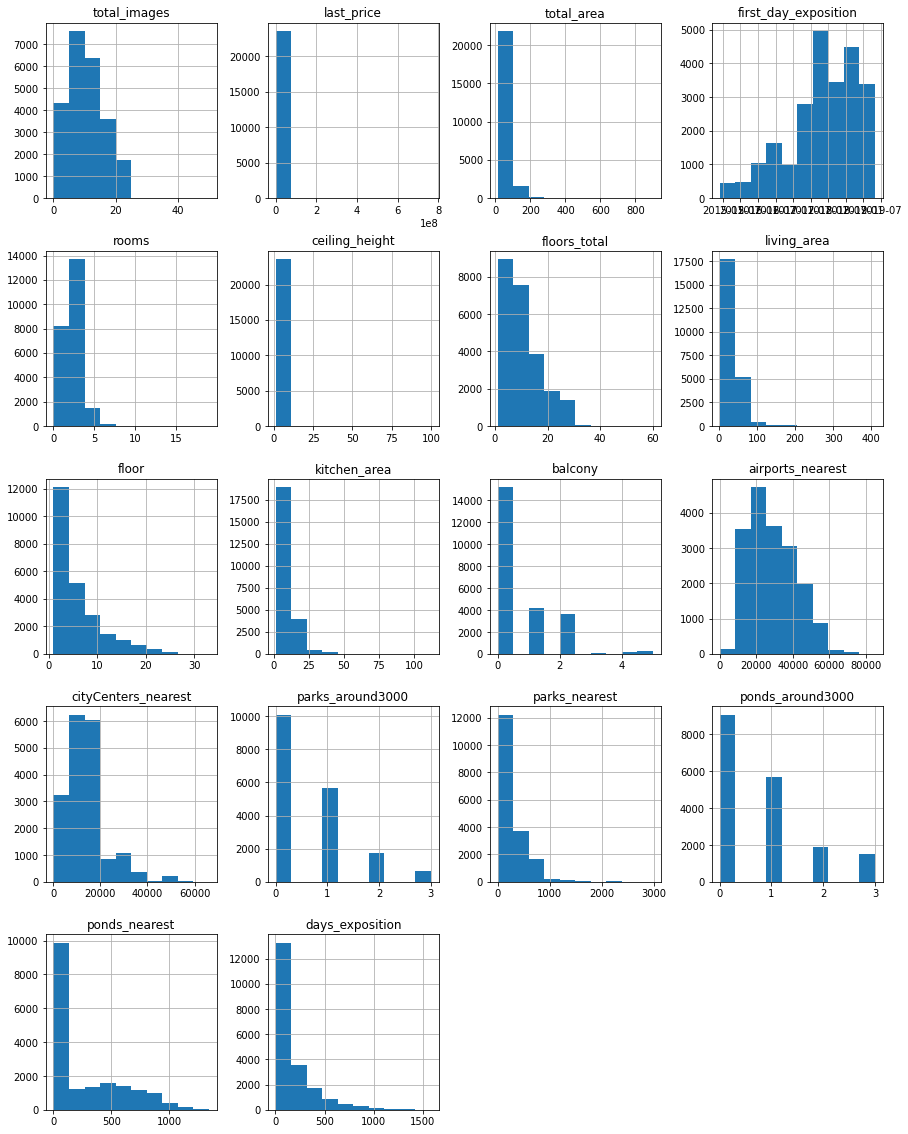

In [ ]:
# повторный вывод графиков для анализа аномалий
data.hist(figsize=(15,20))
plt.show()

       total_images    last_price    total_area         rooms  ceiling_height  \
count  23389.000000  2.338900e+04  23389.000000  23389.000000    23389.000000   
mean       9.835136  6.053407e+06     58.629384      2.046005        2.688936   
std        5.661313  5.877083e+06     28.229910      1.023758        0.195179   
min        0.000000  1.219000e+04     12.000000      0.000000        1.000000   
25%        6.000000  3.400000e+06     40.000000      1.000000        2.600000   
50%        9.000000  4.600000e+06     52.000000      2.000000        2.650000   
75%       14.000000  6.700000e+06     69.000000      3.000000        2.700000   
max       50.000000  1.599840e+08    249.900000     14.000000        3.980000   

       floors_total   living_area         floor  kitchen_area       balcony  \
count  23389.000000  23389.000000  23389.000000  23389.000000  23389.000000   
mean      10.709393     33.466598      5.903373     10.246853      0.592800   
std        6.581389     18.395108

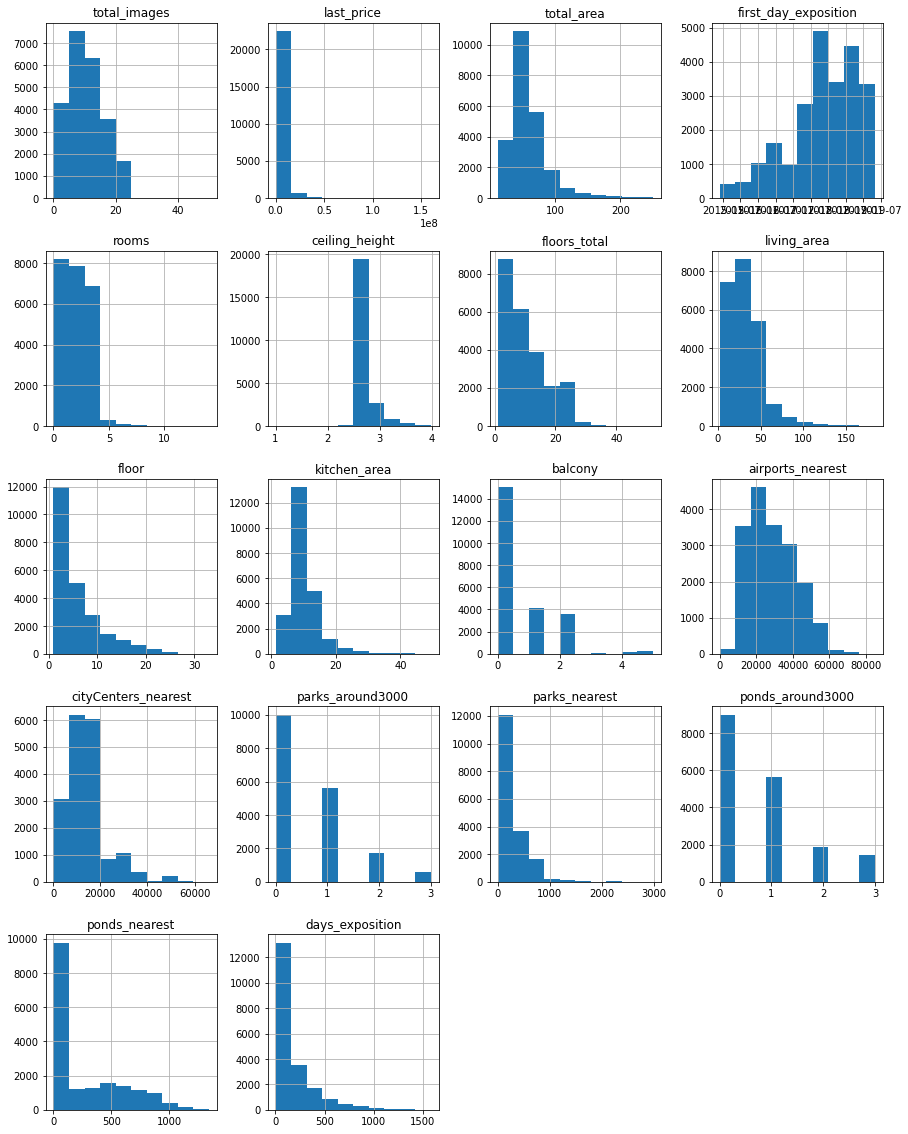

In [ ]:
#print(data.describe()) #вывод аномальных значений через метод describe

#обработка аномальных значений
#удаление аномальных значений и запись в новую "чистую" data
data_clr=data.query('ceiling_height<4 and floors_total<60 and total_area<250 and living_area<200 and kitchen_area<50 and last_price<160000000')
#в случае с ceiling_height значения 25 и 30 можно преобразовать к стандартным параметрам
#(вероятно допущена ошибка и пропущена запятая при заполнении)
data_clr.loc[data_clr['ceiling_height']>23,'ceiling_height']=data_clr.loc[data_clr['ceiling_height']>23,'ceiling_height']/10

print(data_clr.describe()) #проверка
data_clr.hist(figsize=(15,20))
plt.show()

In [ ]:
#обработка дубликатов и приведение наименовааний локаций к одному стандарту

data_clr['locality_name']=data_clr['locality_name'].str.replace('посёлок городского типа ', '')
data_clr['locality_name']=data_clr['locality_name'].str.replace('поселок ', '')
data_clr['locality_name']=data_clr['locality_name'].str.replace('посёлок ', '')
data_clr['locality_name']=data_clr['locality_name'].str.replace('село ', '')
data_clr['locality_name']=data_clr['locality_name'].str.replace('деревня ', '')
data_clr['locality_name']=data_clr['locality_name'].str.replace('городского типа ', '')
data_clr['locality_name']=data_clr['locality_name'].str.replace('городской ', '')
data_clr['locality_name']=data_clr['locality_name'].str.replace('  ', '')
data_clr['locality_name']=data_clr['locality_name'].str.replace('садоводческое некоммерческое товарищество ', '')
data_clr['locality_name']=data_clr['locality_name'].str.replace('садовое товарищество ', '')
data_clr['locality_name']=data_clr['locality_name'].str.replace('коттеджный ', '')


print(data_clr['locality_name'].unique()) #вывод

['Санкт-Петербург' 'Шушары' 'Янино-1' 'Парголово' 'Мурино' 'Ломоносов'
 'Сертолово' 'Петергоф' 'Пушкин' 'Кудрово' 'Коммунар' 'Колпино'
 'Красный Бор' 'Гатчина' 'Фёдоровское' 'Выборг' 'Кронштадт' 'Кировск'
 'Новое Девяткино' 'Металлострой' 'Лебяжье' 'Сиверский' 'Молодцово'
 'Кузьмоловский' 'Новая Ропша' 'Павловск' 'Пикколово' 'Всеволожск'
 'Волхов' 'Кингисепп' 'Приозерск' 'Сестрорецк' 'Куттузи' 'Аннино'
 'Ефимовский' 'Плодовое' 'Заклинье' 'Торковичи' 'Первомайское'
 'Красное Село' 'Понтонный' 'Сясьстрой' 'Старая' 'Лесколово' 'Новый Свет'
 'Сланцы' 'Путилово' 'Ивангород' 'Шлиссельбург' 'Никольское' 'Зеленогорск'
 'Сосновый Бор' 'Оржицы' 'Кальтино' 'Романовка' 'Бугры' 'Рощино' 'Кириши'
 'Луга' 'Волосово' 'Отрадное' 'Павлово' 'Оредеж' 'Копорье' 'Молодёжное'
 'Тихвин' 'Победа' 'Нурма' 'Синявино' 'Тосно' 'Стрельна' 'Бокситогорск'
 'Александровская' 'Лопухинка' 'Пикалёво' 'Терволово' 'Советский'
 'Подпорожье' 'Петровское' 'Токсово' 'Сельцо' 'Вырица' 'Кипень' 'Келози'
 'Вартемяги' 'Тельмана' '

In [ ]:
print(data_clr.isna().sum())# перепроверка на наличие пропусков
print(data_clr.info()) #вывод информации о "очищенном" data

total_images               0
last_price                 0
total_area                 0
first_day_exposition       0
rooms                      0
ceiling_height             0
floors_total               0
living_area                0
floor                      0
is_apartment               0
studio                     0
open_plan                  0
kitchen_area               0
balcony                    0
locality_name              0
airports_nearest        5508
cityCenters_nearest     5488
parks_around3000        5487
parks_nearest           5487
ponds_around3000        5487
ponds_nearest           5487
days_exposition         3122
dtype: int64
<class 'pandas.core.frame.DataFrame'>
Int64Index: 23389 entries, 0 to 23649
Data columns (total 22 columns):
 #   Column                Non-Null Count  Dtype         
---  ------                --------------  -----         
 0   total_images          23389 non-null  int64         
 1   last_price            23389 non-null  float64       
 2   tot

### Посчитайте и добавьте в таблицу новые столбцы

In [ ]:
#подсчет средней цены 1кв м. вне зависимости от локации
data_clr['price_one_m']=data_clr['last_price']/data_clr['total_area']
print(data_clr['price_one_m'])

0        120370.370370
1         82920.792079
2         92785.714286
3        408176.100629
4        100000.000000
             ...      
23645     72490.845228
23646     52542.372881
23647     44091.710758
23648    149511.400651
23649     41795.665635
Name: price_one_m, Length: 23389, dtype: float64


In [ ]:
#добавление день недели публикации объявления (0 — понедельник, 1 — вторник и так далее);
data_clr['weekday']=data_clr['first_day_exposition'].dt.weekday
#месяц публикации объявления
data_clr['month']=data_clr['first_day_exposition'].dt.month
#год публикации объявления
data_clr['year']=data_clr['first_day_exposition'].dt.year
display(data_clr.head(10))

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition,price_one_m,weekday,month,year
0,20,13000000.0,108.00,2019-03-07,3,2.70,16,51.00,8,False,...,16028.0,1.0,482.0,2.0,755.0,NaN,120370.370370,3,3,2019
1,7,3350000.0,40.40,2018-12-04,1,2.65,11,18.60,1,False,...,18603.0,0.0,0.0,0.0,0.0,81.0,82920.792079,1,12,2018
2,10,5196000.0,56.00,2015-08-20,2,2.65,5,34.30,4,False,...,13933.0,1.0,90.0,2.0,574.0,558.0,92785.714286,3,8,2015
3,0,64900000.0,159.00,2015-07-24,3,2.65,14,45.00,9,False,...,6800.0,2.0,84.0,3.0,234.0,424.0,408176.100629,4,7,2015
4,2,10000000.0,100.00,2018-06-19,2,3.03,14,32.00,13,False,...,8098.0,2.0,112.0,1.0,48.0,121.0,100000.000000,1,6,2018
5,10,2890000.0,30.40,2018-09-10,1,2.65,12,14.40,5,False,...,NaN,NaN,NaN,NaN,NaN,55.0,95065.789474,0,9,2018
6,6,3700000.0,37.30,2017-11-02,1,2.65,26,10.60,6,False,...,19143.0,0.0,0.0,0.0,0.0,155.0,99195.710456,3,11,2017
7,5,7915000.0,71.60,2019-04-18,2,2.65,24,30.50,22,False,...,11634.0,0.0,0.0,0.0,0.0,NaN,110544.692737,3,4,2019
8,20,2900000.0,33.16,2018-05-23,1,2.65,27,15.43,26,False,...,NaN,NaN,NaN,NaN,NaN,189.0,87454.764777,2,5,2018
9,18,5400000.0,61.00,2017-02-26,3,2.50,9,43.60,7,False,...,15008.0,0.0,0.0,0.0,0.0,289.0,88524.590164,6,2,2017


In [ ]:
#тип этажа квартиры (значения — «первый», «последний», «другой»);
def namefloor (row):
    floor=row['floor']
    floors_total=row['floors_total']

    if floor == 1:
        return 'Первый'
    elif floor == floors_total:
        return 'Последний'
    else:
        return 'Другой'
data_clr['num_floor']=data_clr.apply(namefloor, axis=1)
display(data_clr.head(15))

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition,price_one_m,weekday,month,year,num_floor
0,20,13000000.0,108.00,2019-03-07,3,2.70,16,51.00,8,False,...,1.0,482.0,2.0,755.0,NaN,120370.370370,3,3,2019,Другой
1,7,3350000.0,40.40,2018-12-04,1,2.65,11,18.60,1,False,...,0.0,0.0,0.0,0.0,81.0,82920.792079,1,12,2018,Первый
2,10,5196000.0,56.00,2015-08-20,2,2.65,5,34.30,4,False,...,1.0,90.0,2.0,574.0,558.0,92785.714286,3,8,2015,Другой
3,0,64900000.0,159.00,2015-07-24,3,2.65,14,45.00,9,False,...,2.0,84.0,3.0,234.0,424.0,408176.100629,4,7,2015,Другой
4,2,10000000.0,100.00,2018-06-19,2,3.03,14,32.00,13,False,...,2.0,112.0,1.0,48.0,121.0,100000.000000,1,6,2018,Другой
5,10,2890000.0,30.40,2018-09-10,1,2.65,12,14.40,5,False,...,NaN,NaN,NaN,NaN,55.0,95065.789474,0,9,2018,Другой
6,6,3700000.0,37.30,2017-11-02,1,2.65,26,10.60,6,False,...,0.0,0.0,0.0,0.0,155.0,99195.710456,3,11,2017,Другой
7,5,7915000.0,71.60,2019-04-18,2,2.65,24,30.50,22,False,...,0.0,0.0,0.0,0.0,NaN,110544.692737,3,4,2019,Другой
8,20,2900000.0,33.16,2018-05-23,1,2.65,27,15.43,26,False,...,NaN,NaN,NaN,NaN,189.0,87454.764777,2,5,2018,Другой
9,18,5400000.0,61.00,2017-02-26,3,2.50,9,43.60,7,False,...,0.0,0.0,0.0,0.0,289.0,88524.590164,6,2,2017,Другой


In [ ]:
#расстояние до центра города в километрах (переведите из м в км и округлите до целых значений).
data_clr['km_cityCenters']=data_clr['cityCenters_nearest']/1000
data_clr['km_cityCenters']=round(data_clr['km_cityCenters'],0)
display(data_clr.head())

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,parks_nearest,ponds_around3000,ponds_nearest,days_exposition,price_one_m,weekday,month,year,num_floor,km_cityCenters
0,20,13000000.0,108.0,2019-03-07,3,2.70,16,51.0,8,False,...,482.0,2.0,755.0,NaN,120370.370370,3,3,2019,Другой,16.0
1,7,3350000.0,40.4,2018-12-04,1,2.65,11,18.6,1,False,...,0.0,0.0,0.0,81.0,82920.792079,1,12,2018,Первый,19.0
2,10,5196000.0,56.0,2015-08-20,2,2.65,5,34.3,4,False,...,90.0,2.0,574.0,558.0,92785.714286,3,8,2015,Другой,14.0
3,0,64900000.0,159.0,2015-07-24,3,2.65,14,45.0,9,False,...,84.0,3.0,234.0,424.0,408176.100629,4,7,2015,Другой,7.0
4,2,10000000.0,100.0,2018-06-19,2,3.03,14,32.0,13,False,...,112.0,1.0,48.0,121.0,100000.000000,1,6,2018,Другой,8.0


### Проведите исследовательский анализ данных

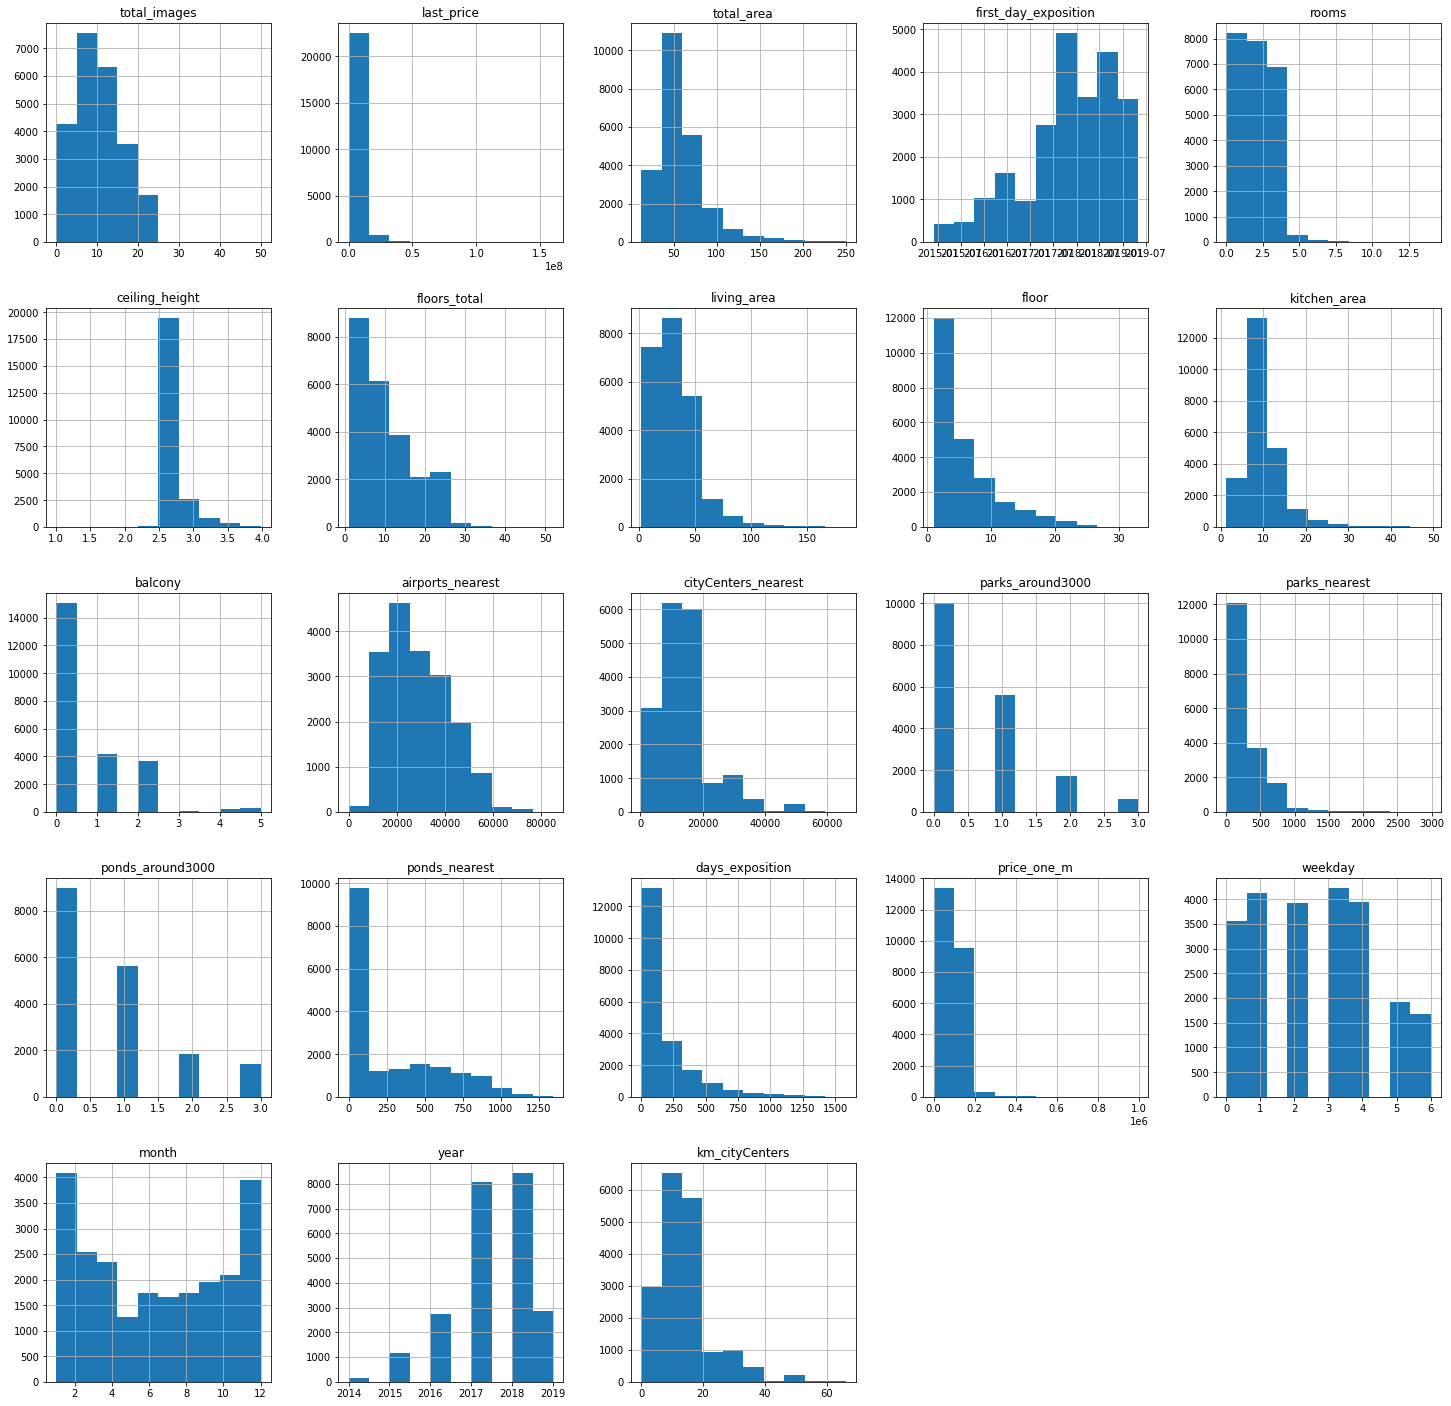

In [ ]:
# графическая иллюстрация содержимого сета
data_clr.hist(figsize=(25,25))
plt.show()

In [ ]:
# таблица корреляции
print(data_clr.corr())

                     total_images  last_price  total_area     rooms  \
total_images             1.000000    0.129275    0.117100  0.095789   
last_price               0.129275    1.000000    0.724658  0.442290   
total_area               0.117100    0.724658    1.000000  0.793650   
rooms                    0.095789    0.442290    0.793650  1.000000   
ceiling_height           0.040933    0.375178    0.398817  0.227329   
floors_total             0.012550    0.027253   -0.061886 -0.226049   
living_area              0.103283    0.609062    0.916343  0.877242   
floor                    0.031026    0.044818   -0.026401 -0.155281   
is_apartment             0.013187    0.028227    0.016980 -0.001906   
studio                  -0.028440   -0.040976   -0.088023 -0.153692   
open_plan               -0.023712   -0.020697   -0.049731 -0.089639   
kitchen_area             0.099107    0.503731    0.557415  0.227273   
balcony                  0.049984    0.021092    0.026893 -0.010313   
airpor

In [ ]:
data_clr.describe() # вывод дополнительной описательной статистики

,total_images,last_price,total_area,rooms,ceiling_height,floors_total,living_area,floor,kitchen_area,balcony,...,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition,price_one_m,weekday,month,year,km_cityCenters
count,23389.000000,2.338900e+04,23389.000000,23389.000000,23389.000000,23389.000000,23389.000000,23389.000000,23389.000000,23389.000000,...,17902.000000,17902.000000,17902.000000,17902.000000,20267.000000,23389.000000,23389.000000,23389.000000,23389.000000,17901.000000
mean,9.835136,6.053407e+06,58.629384,2.046005,2.688936,10.709393,33.466598,5.903373,10.246853,0.592800,...,0.603899,216.565468,0.761870,259.128310,179.795234,98176.486726,2.568601,6.401086,2017.371628,14.276968
std,5.661313,5.877083e+06,28.229910,1.023758,0.195179,6.581389,18.395108,4.890557,4.809905,0.959141,...,0.794943,331.520263,0.931839,325.759731,218.873535,42776.288335,1.789686,3.490112,1.036734,8.590377
min,0.000000,1.219000e+04,12.000000,0.000000,1.000000,1.000000,2.000000,1.000000,1.300000,0.000000,...,0.000000,0.000000,0.000000,0.000000,1.000000,111.834862,0.000000,1.000000,2014.000000,0.000000
25%,6.000000,3.400000e+06,40.000000,1.000000,2.600000,5.000000,18.300000,2.000000,7.300000,0.000000,...,0.000000,0.000000,0.000000,0.000000,45.000000,76470.588235,1.000000,3.000000,2017.000000,9.000000
50%,9.000000,4.600000e+06,52.000000,2.000000,2.650000,9.000000,30.100000,4.000000,9.040000,0.000000,...,0.000000,0.000000,0.000000,0.000000,95.000000,94808.126411,3.000000,6.000000,2017.000000,13.000000
75%,14.000000,6.700000e+06,69.000000,3.000000,2.700000,16.000000,42.200000,8.000000,11.400000,1.000000,...,1.000000,414.000000,1.000000,503.000000,229.000000,113808.801214,4.000000,10.000000,2018.000000,16.000000
max,50.000000,1.599840e+08,249.900000,14.000000,3.980000,52.000000,184.000000,33.000000,49.400000,5.000000,...,3.000000,2984.000000,3.000000,1344.000000,1580.000000,995983.935743,6.000000,12.000000,2019.000000,66.000000


AxesSubplot(0.125,0.125;0.775x0.755)


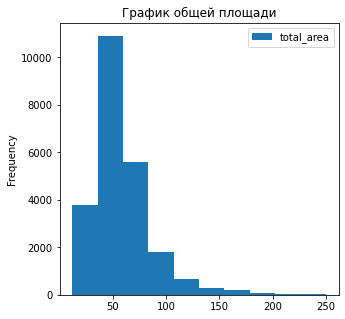

In [ ]:
# вывод графика площадей квартир
print(data_clr.plot(y='total_area', kind='hist', figsize=(5,5),title='График общей площади'))
plt.show()

**Вывод** Исходя из графика, наибольшее кол-во квартир 50 кв.м. (соответствует пику). Треть-площадью до 100 кв.м. Свыше 150 кв. м. является редким явлением. Максимальное значение в размере 249 кв.м. вероятно соответсвует дорогой недвижимости. (анализ проведен,значения соответствуют действительности)

In [ ]:
print(data_clr[data_clr['total_area']==249]) #анализ максимального значения (аномалии)

     total_images  last_price  total_area first_day_exposition  rooms  \
681            20  24900000.0       249.0           2015-08-13      7   

     ceiling_height  floors_total  living_area  floor  is_apartment  ...  \
681            2.65             5        180.0      4         False  ...   

     parks_nearest  ponds_around3000  ponds_nearest  days_exposition  \
681            0.0               0.0            0.0            781.0   

    price_one_m  weekday  month  year  num_floor  km_cityCenters  
681    100000.0        3      8  2015     Другой             6.0  

[1 rows x 28 columns]


AxesSubplot(0.125,0.125;0.775x0.755)


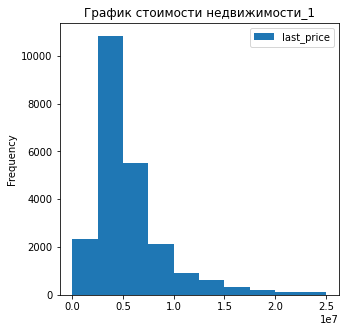

AxesSubplot(0.125,0.125;0.775x0.755)


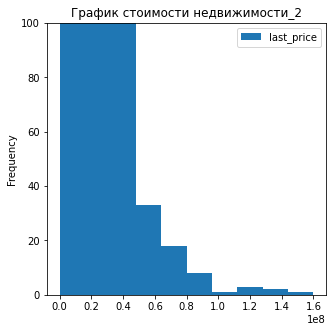

AxesSubplot(0.125,0.125;0.775x0.755)


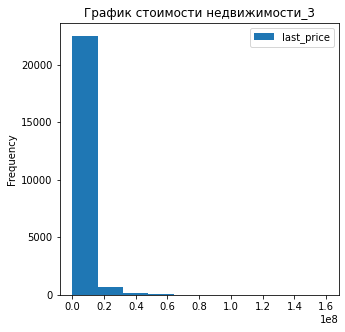

In [ ]:
#вывод графика для анализа last_price в диапазоне от 0 до 25 000 000 (для иллюстрации пиков)
print(data_clr.plot(y='last_price', kind='hist', range=(0,25000000),figsize=(5,5),title='График стоимости недвижимости_1'))
plt.show()
#вывод графика для анализа last_price в выборке от 0 до 100 для просмотра возможных аномалий
print(data_clr.plot(y='last_price', kind='hist', ylim=(0,100),figsize=(5,5),title='График стоимости недвижимости_2'))
plt.show()
#вывод графика для анализа last_price
print(data_clr.plot(y='last_price', kind='hist',figsize=(5,5),title='График стоимости недвижимости_3'))
plt.show()

**Вывод** исходя из графика в основном (почти половина) стоимость объектов составляет около 5 000 000 руб и немного меньше. Треть объектов имеет стоимость выше до 10 000 000 руб. Дороже - крайне редко. Обнаруженная аномалия стоимостью почти 160000000 вероятно принадлежит дорогой недвижимости. (проанализирована аномалия, установлено, что недвижимость имеет большую площадь жилую площадь, большое кол-во комнат. Наиболее вероятно, значения соответствуют действительность).

In [ ]:
print(data_clr[data_clr['last_price']==159984000.0]) #анализ "макисмально дорогой" недвижимости

      total_images   last_price  total_area first_day_exposition  rooms  \
2534            16  159984000.0       242.4           2015-08-27      4   

      ceiling_height  floors_total  living_area  floor  is_apartment  ...  \
2534            3.85             9        131.0      7         False  ...   

      parks_nearest  ponds_around3000  ponds_nearest  days_exposition  \
2534          679.0               1.0          227.0            501.0   

     price_one_m  weekday  month  year  num_floor  km_cityCenters  
2534    660000.0        3      8  2015     Другой             2.0  

[1 rows x 28 columns]


AxesSubplot(0.125,0.125;0.775x0.755)


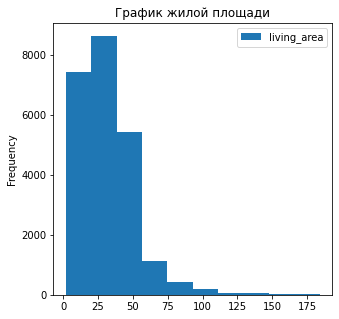

In [ ]:
#вывод графика площадей квартир
print(data_clr.plot(y='living_area', kind='hist', figsize=(5,5),title='График жилой площади'))
plt.show()

**Вывод** Исходя из графика, частая жилая площадь квартир 25- 50 кв.м. (соответствует пику). Треть-площадь до 75 кв.м. Свыше 100 кв. м. является редким явлением. Максимальное значение в размере 249 кв.м. вероятно соответсвует дорогой недвижимости. (анализ проведен,значения соответствуют действительности)

In [ ]:
print(data_clr[data_clr['living_area']==184.0]) #анализ максиммального значения (аномалии)

      total_images  last_price  total_area first_day_exposition  rooms  \
3039            11  33000000.0       240.0           2018-08-20      6   

      ceiling_height  floors_total  living_area  floor  is_apartment  ...  \
3039            2.65             8        184.0      4         False  ...   

      parks_nearest  ponds_around3000  ponds_nearest  days_exposition  \
3039          292.0               3.0          449.0              NaN   

     price_one_m  weekday  month  year  num_floor  km_cityCenters  
3039    137500.0        0      8  2018     Другой             8.0  

[1 rows x 28 columns]


AxesSubplot(0.125,0.125;0.775x0.755)


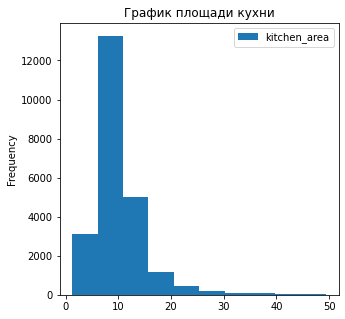

In [ ]:
# график площадей кухни квартир
print(data_clr.plot(y='kitchen_area', kind='hist', figsize=(5,5),title='График площади кухни'))
plt.show()

**Вывод** Исходя из графика, частая площадь кухни квартир 10 кв.м. (соответствует пику). Треть-площадь до 15 кв.м. Свыше 20 кв. м. является редким явлением. Максимальное значение в размере 49 кв.м. вероятно соответсвует дорогой недвижимости. (анализ проведен,значения соответствуют действительности)

In [ ]:
print(data_clr[data_clr['kitchen_area']==49.4])#анализ максиммального значения (аномалии)

       total_images  last_price  total_area first_day_exposition  rooms  \
21289            15  16000000.0        93.4           2019-03-26      3   

       ceiling_height  floors_total  living_area  floor  is_apartment  ...  \
21289             2.8            17         24.3      6         False  ...   

       parks_nearest  ponds_around3000  ponds_nearest  days_exposition  \
21289            0.0               2.0          495.0              NaN   

        price_one_m  weekday  month  year  num_floor  km_cityCenters  
21289  171306.20985        1      3  2019     Другой             8.0  

[1 rows x 28 columns]


AxesSubplot(0.125,0.125;0.775x0.755)


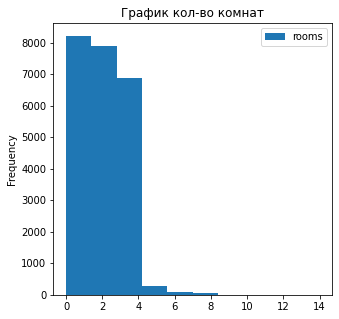

In [ ]:
# график кол-ва комнат
print(data_clr.plot(y='rooms', kind='hist', figsize=(5,5),title='График кол-во комнат'))
plt.show()

**Вывод** наибольшая часть предложений составляет однокомнатные квартиры, при этом в основном предложения предполагают до 4х комнат. Свыше 4 комнат - крайне редко. максимальное значение 14 комнат (предложение вероятно соответствует действительности)

In [ ]:
print(data_clr[data_clr['rooms']==14])#анализ максиммального значения (аномалии)

       total_images  last_price  total_area first_day_exposition  rooms  \
20789             6  28659000.0       245.4           2016-03-31     14   

       ceiling_height  floors_total  living_area  floor  is_apartment  ...  \
20789            2.65             4        168.3      2         False  ...   

       parks_nearest  ponds_around3000  ponds_nearest  days_exposition  \
20789          541.0               2.0          118.0             95.0   

         price_one_m  weekday  month  year  num_floor  km_cityCenters  
20789  116784.841076        3      3  2016     Другой             2.0  

[1 rows x 28 columns]


AxesSubplot(0.125,0.125;0.775x0.755)


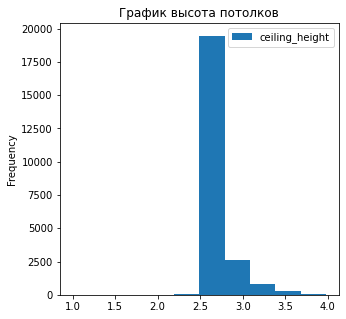

In [ ]:
# график высоты потолков
print(data_clr.plot(y='ceiling_height', kind='hist', figsize=(5,5),title='График высота потолков'))
plt.show()

**Вывод** В основном высота потолков составляет от 2.5 до 3 метров. Максимальное значение составляет почти 4 метра (во избежание допущения аномалии был проведен анализ. Данные вероятно соответствуют действительности)

In [ ]:
print(data_clr[data_clr['ceiling_height']==3.98])#анализ максиммального значения (аномалии)

      total_images  last_price  total_area first_day_exposition  rooms  \
1976            15   8150000.0        53.8           2017-02-10      2   

      ceiling_height  floors_total  living_area  floor  is_apartment  ...  \
1976            3.98             4         29.5      2         False  ...   

      parks_nearest  ponds_around3000  ponds_nearest  days_exposition  \
1976          293.0               1.0         1093.0             89.0   

        price_one_m  weekday  month  year  num_floor  km_cityCenters  
1976  151486.988848        4      2  2017     Другой             5.0  

[1 rows x 28 columns]


AxesSubplot(0.125,0.125;0.775x0.755)


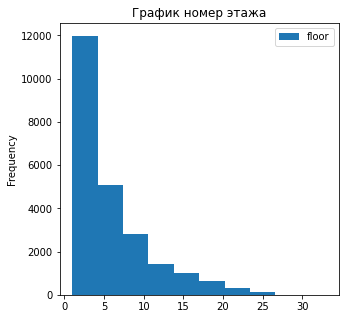

In [ ]:
# график этажности
print(data_clr.plot(y='floor', kind='hist', figsize=(5,5),title='График номер этажа'))
plt.show()

**Вывод** В основном предложения "находятся" на этажах до 5 (наиболее вероятно сказывается кол-во предложений частных домов, которые расположены логично на 1ом этаже). Свыше 10ого этажа предложения встречаются крайне редко. максимальное значение составляет 33 (аномалия проанализирована)

In [ ]:
print(data_clr[data_clr['floor']==33])#анализ максиммального значения (аномалии)

       total_images  last_price  total_area first_day_exposition  rooms  \
18186             4   9900000.0       101.0           2018-09-27      3   

       ceiling_height  floors_total  living_area  floor  is_apartment  ...  \
18186            2.65            35         53.4     33         False  ...   

       parks_nearest  ponds_around3000  ponds_nearest  days_exposition  \
18186            0.0               3.0           72.0              7.0   

       price_one_m  weekday  month  year  num_floor  km_cityCenters  
18186  98019.80198        3      9  2018     Другой            20.0  

[1 rows x 28 columns]


AxesSubplot(0.125,0.125;0.775x0.755)


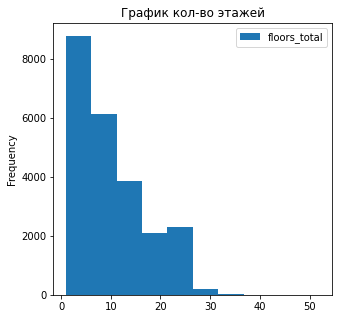

In [ ]:
# график этажности домов в сете
print(data_clr.plot(y='floors_total', kind='hist', figsize=(5,5),title='График кол-во этажей'))
plt.show()

**Вывод** Аналогично с графиком про номер этажей, (наиболее вероятно сказывается кол-во предложений частных домов, которые расположены логично на 1ом этаже), предложений с кол-во до 5 этажей наибольшее кол-во. Свыше 25 этажей предложений почти нет. Пятая часть предложений находятся от 10 до 20 этажах.

           Количество в выборке  Среднеарифметическое по этажу  \
num_floor                                                        
Другой                    17242                       6.479701   
Первый                     2890                       1.000000   
Последний                  3257                       7.203255   

           Среднеарифметическое по цене  
num_floor                                
Другой                     6.331567e+06  
Первый                     4.622061e+06  
Последний                  5.850932e+06  
AxesSubplot(0.125,0.125;0.775x0.755)


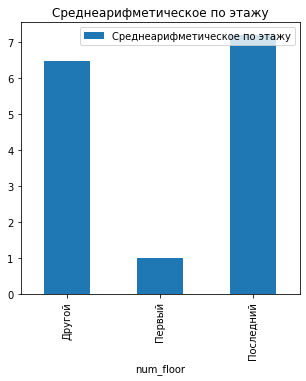

AxesSubplot(0.125,0.125;0.775x0.755)


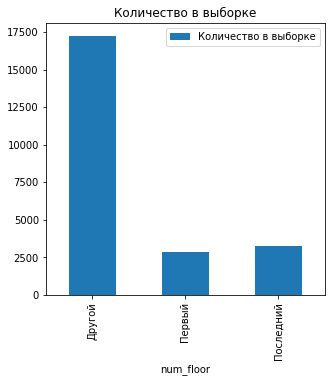

AxesSubplot(0.125,0.125;0.775x0.755)


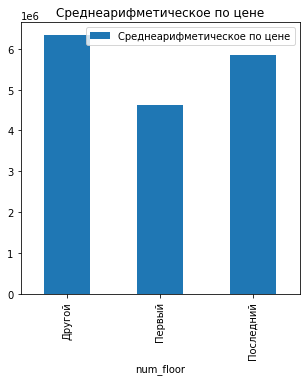

In [ ]:
#построение сводной таблицы для типа этажей
pivot_numfloor=data_clr.pivot_table(index='num_floor', values=['last_price','floor'],aggfunc=['median','count','mean'])

pivot_numfloor.columns=['count-1','count-2','count-3','Количество в выборке','Среднеарифметическое по этажу','Среднеарифметическое по цене']
pivot_numfloor=pivot_numfloor.drop(columns='count-1')
pivot_numfloor=pivot_numfloor.drop(columns='count-2')
pivot_numfloor=pivot_numfloor.drop(columns='count-3')
print(pivot_numfloor)

print(pivot_numfloor.plot(y='Среднеарифметическое по этажу', kind='bar', figsize=(5,5),title='Среднеарифметическое по этажу'))
plt.show()
print(pivot_numfloor.plot(y='Количество в выборке', kind='bar', figsize=(5,5),title='Количество в выборке'))
plt.show()
print(pivot_numfloor.plot(y='Среднеарифметическое по цене', kind='bar', figsize=(5,5),title='Среднеарифметическое по цене'))
plt.show()

**Вывод** При анализе выявлено, что в среднем в значении "Другой" подразумевается 5 этаж, под "Последним" - 7 и выше. При этом в выборке больше всего предложений по типу "Другой". Доля "Первый" и "Последний" гораздо меньше и примерно на одном уровне (по кол-ву предложений). При этом, наиболее дорогие предложения расположены на "Другом" этаже, самый дешёвый вариант на "Первом" этаже и менее дешевле "Другого" является предложения на "Последнем этаже".

AxesSubplot(0.125,0.125;0.775x0.755)


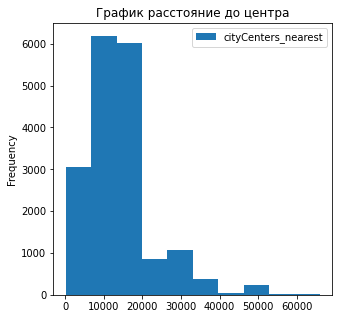

In [ ]:
# график расстояния до цента от местонахождения квартир
print(data_clr.plot(y='cityCenters_nearest', kind='hist', figsize=(5,5),title='График расстояние до центра'))
plt.show()

**Вывод** При анализе выявлено, что в основном предложения расположены на расстоянии от 10 000 до 20 000 метров от центра (т.е. 10-20 км). При этом дальше 20 км предложений меньше, но больше предложений на расстоянии от 25 до 35 км. Минимальное кол-во предложений на расстоянии дальше 40 км. Небольщой "всплеск" на расстонии 50 км (вероятно на этом расстоянии находится поселок городского типа, либо густонаселенный пункт).

AxesSubplot(0.125,0.125;0.775x0.755)


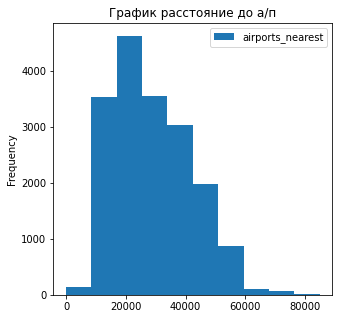

In [ ]:
# расстояние до а/п от квартир
print(data_clr.plot(y='airports_nearest', kind='hist', figsize=(5,5),title='График расстояние до а/п'))
plt.show()

**Вывод** При анализе выявлено, что в основном предложения расположены на расстоянии до 20 000 метров до а/п (20 км). При этом дальше 40 км предложений меньше. Минимальное кол-во предложений на расстоянии дальше 80 км.

AxesSubplot(0.125,0.125;0.775x0.755)


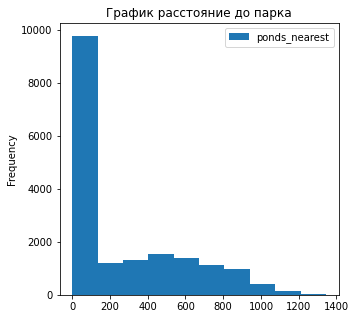

In [ ]:
# расстояние до парка от квартир
print(data_clr.plot(y='ponds_nearest', kind='hist', figsize=(5,5),title='График расстояние до парка'))
plt.show()

**Вывод** При анализе выявлено, с учетом наличия отсутствия информации в трети data, недвижимость, в которой указана информация о парках, либо находится "в шаге" от него, либо в непосредственной близости. Поэтому, исходя из графика, расстояние до парка максимальное около 1200 м (1,2 км).

         Среднеарифметическое значение цены по выборке
weekday                                               
0                                         6.039232e+06
1                                         6.016708e+06
2                                         6.064191e+06
3                                         6.308646e+06
4                                         5.966782e+06
5                                         5.906791e+06
6                                         5.876572e+06
         Кол-во продаж для каждого дня недели
weekday                                      
0                                        3570
1                                        4131
2                                        3922
3                                        4227
4                                        3951
5                                        1911
6                                        1677
AxesSubplot(0.125,0.125;0.775x0.755)


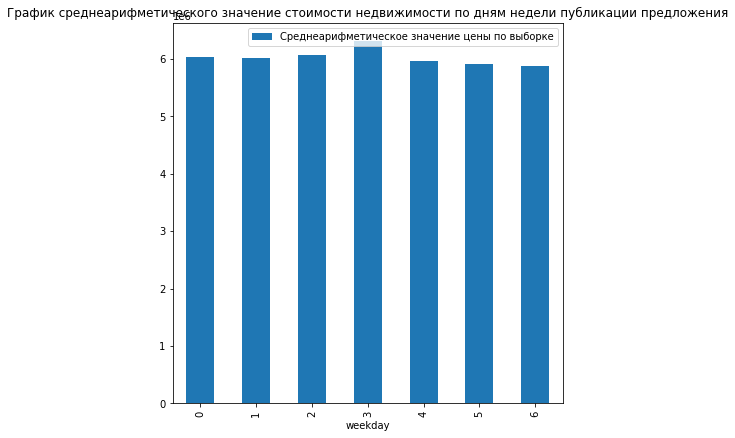

AxesSubplot(0.125,0.125;0.775x0.755)


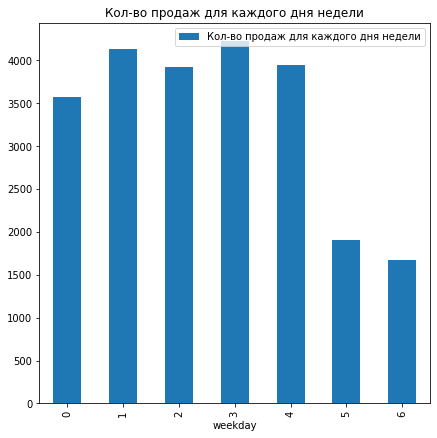

In [ ]:
#построение сводной таблицы для типа дня недели
pivot_day=data_clr.pivot_table(index='weekday', values=['total_area'],aggfunc=['count'])
pivot_numday=data_clr.pivot_table(index='weekday', values=['last_price'],aggfunc=['mean'])
pivot_numday.columns=['Среднеарифметическое значение цены по выборке']
pivot_day.columns=['Кол-во продаж для каждого дня недели']
print(pivot_numday)
print(pivot_day)

print(pivot_numday.plot(y='Среднеарифметическое значение цены по выборке', kind='bar', figsize=(7,7),title='График среднеарифметического значение стоимости недвижимости по дням недели публикации предложения'))
plt.show()
print(pivot_day.plot(y='Кол-во продаж для каждого дня недели', kind='bar', figsize=(7,7),title='Кол-во продаж для каждого дня недели'))
plt.show()

**Вывод** Исходя из графика, стоимость квартиры правктически не отличается в зависимости от дня недели публикации. Есть небольшое увеличение стоимости по предложениям размещенные в четверг, но с учетом значения этого "всплеска", предлагается остановится на выводе о том, что день недели не влияет на стоимость.  
При этом чаще всего предложения публиковались во вторник и четверг, и резкий спад обнаружен на субботу и воскресенье (вероятно потому что у риелторов тоже есть выходные)

       Среднеарифметическое значение цены по выборке
month                                               
1                                       6.058129e+06
2                                       6.077360e+06
3                                       5.835147e+06
4                                       5.995374e+06
5                                       6.072333e+06
6                                       5.894291e+06
7                                       6.106125e+06
8                                       6.304791e+06
9                                       6.189688e+06
10                                      5.847528e+06
11                                      6.133212e+06
12                                      6.258210e+06
       Кол-во продаж для каждого месяца
month                                  
1                                  1472
2                                  2614
3                                  2546
4                                  2348
5                 

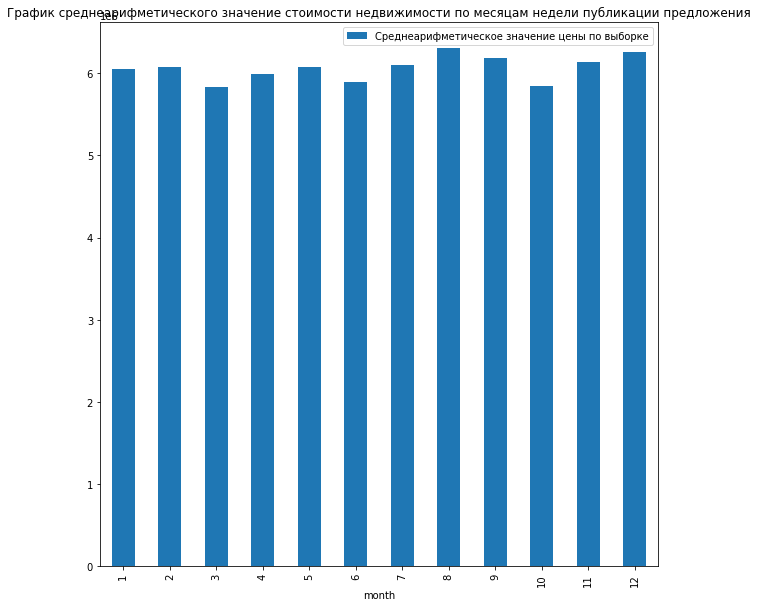

AxesSubplot(0.125,0.125;0.775x0.755)


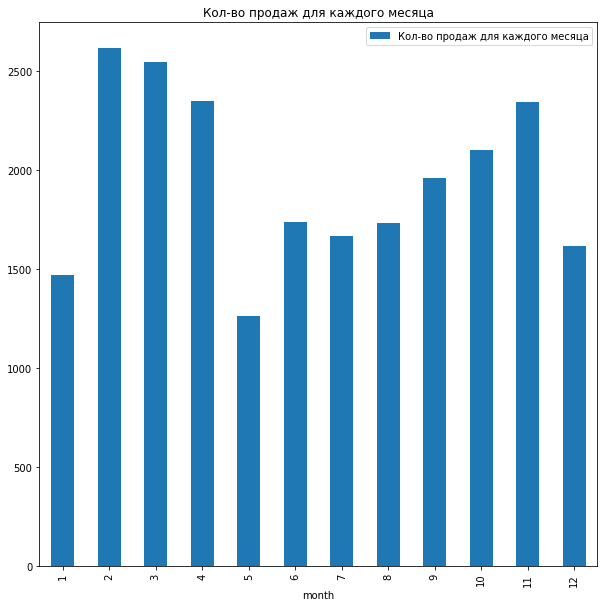

In [ ]:
#построение сводной таблицы для типа месяцев
pivot_month=data_clr.pivot_table(index='month', values=['total_area'],aggfunc=['count'])
pivot_nummonth=data_clr.pivot_table(index='month', values=['last_price'],aggfunc=['mean'])
pivot_nummonth.columns=['Среднеарифметическое значение цены по выборке']
pivot_month.columns=['Кол-во продаж для каждого месяца']
print(pivot_nummonth)
print(pivot_month)

print(pivot_nummonth.plot(y='Среднеарифметическое значение цены по выборке', kind='bar', figsize=(10,10),title='График среднеарифметического значение стоимости недвижимости по месяцам недели публикации предложения'))
plt.show()
print(pivot_month.plot(y='Кол-во продаж для каждого месяца', kind='bar', figsize=(10,10),title='Кол-во продаж для каждого месяца'))
plt.show()

**Вывод** Исходя из графика, аналогично графику с днями недели, стоимость почти не изменяется в зависимости от месяца размещения. При этом, максимальное значение приходится на 8 и 12 месяцы и минимальные на 3 и 10 месяцы. При сравнении максимальных и минимальных показателей разница может быть небольшой (до 500 т.р.).  
Чаще всего публиковались в феврале и в ноябре. Спады в мае явно связаны с праздниками и выходными (небольшие спады с июля-август можно объяснить сезоном отпуска).
Пиковые значения обусловлены началом года (январь-также полон праздников, поэтому предложений немного) и концом года (в декабре множество людей берут отпуска либо предпочтитают отложить оформление и проведение сделки на следующий год)

In [ ]:
#как быстро продавались квартиры
data_clr['days_exposition'].describe() # вывод информации о столбце days_exposition

count    20267.000000
mean       179.795234
std        218.873535
min          1.000000
25%         45.000000
50%         95.000000
75%        229.000000
max       1580.000000
Name: days_exposition, dtype: float64

AxesSubplot(0.125,0.125;0.775x0.755)


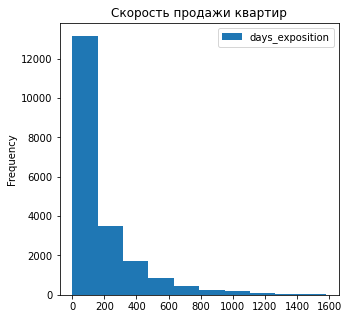

In [ ]:
# иллюстрация скорости продажи квартир (дней экспозиции)
print(data_clr.plot(y='days_exposition', kind='hist', figsize=(5,5),title='Скорость продажи квартир'))
plt.show()

AxesSubplot(0.125,0.125;0.775x0.755)


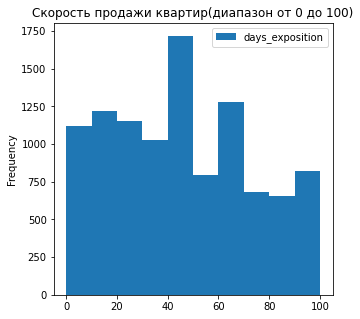

In [ ]:
# иллюстрация скорости продажи квартир (дней экспозиции) увеличенный размер графика
print(data_clr.plot(y='days_exposition', kind='hist',range=(0,100), figsize=(5,5),title='Скорость продажи квартир(диапазон от 0 до 100)'))
plt.show()

**Вывод**
Чаще всего сделки с недвижимостью занимали до 200 дней (исходя из графика), что соответствует значению среднего арифметического (179) значения. Быстрыми продажами можно считать до 95 дней (соответствует медианному значению). Исходя из таблицы и графика, случаи продажи квартиры более 2 лет, в целом, можно считать крайне специфичными. При этом, считать их аномальными преждевременно, вероятно наличие множество субъективных факторов.

**Доп.Вывод** Дополнительный график иллюстрирует, что пик (т.е. наиболее чаще) сделки занимают от 40 до 50 дней. Реже сделки занимают от 50 до 60 дней. При этом, второй по частотности пик приходится на показатель от 60 до 70 дней.
Наиболее вероятно, такие сроки можно назвать быстрыми продажами (когда необходимо по разным причинам максимально в короткий срок продать недвижимость)

In [ ]:
#Посчитайте среднюю цену одного квадратного метра в 10 населённых пунктах с наибольшим числом объявлений.
#Выделите населённые пункты с самой высокой и низкой стоимостью квадратного метра.
dc_pivot_local=data_clr.pivot_table(index='locality_name',values=['total_area','last_price'],aggfunc=['median','count'])
dc_pivot_local.columns =['med_price', 'med_area','count','count_2']
dc_pivot_local=dc_pivot_local.drop(columns='count_2')
dc_pivot_local['med_price_one_m']=dc_pivot_local['med_price']/dc_pivot_local['med_area']
print(dc_pivot_local.sort_values(by='count', ascending=False).head(10))

                 med_price  med_area  count  med_price_one_m
locality_name                                               
Санкт-Петербург  5500000.0    54.675  15492    100594.421582
Мурино           3400000.0    37.430    587     90836.227625
Кудрово          3890000.0    40.000    472     97250.000000
Шушары           3950000.0    50.100    440     78842.315369
Всеволожск       3450000.0    53.550    396     64425.770308
Пушкин           5150000.0    53.000    363     97169.811321
Колпино          3600000.0    50.000    337     72000.000000
Парголово        4100000.0    43.000    327     95348.837209
Гатчина          3090000.0    45.000    305     68666.666667
Выборг           2850000.0    50.000    235     57000.000000


AxesSubplot(0.125,0.125;0.775x0.755)


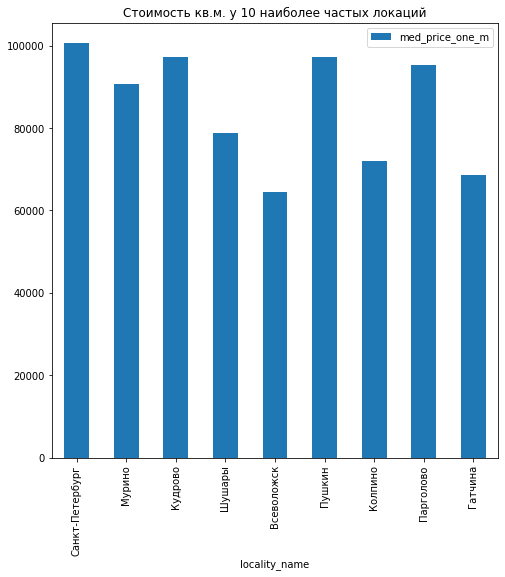

In [ ]:
#вывод графика для сводной таблицы анализа стоимости 1 кв.м. в зависимости от локации
print(dc_pivot_local.sort_values(by='count', ascending=False).query('count>235').plot(y='med_price_one_m', kind='bar', xlim=(0,10), figsize=(8,8),title='Стоимость кв.м. у 10 наиболее частых локаций'))
plt.show()

**Вывод**
Исходя из данных таблицы видно, что наибольшее кол-во преложений приходится на Санкт-Петербург, где средняя стоимость 1 кв.м. составляет 100594 руб., что немногим выше средней цены за 1 кв. без учета местности (88461 руб.). На втором месте находятся локации Мурино, Кудрово, Пушкин и Парголово где стоимость 1 кв.м. немногим ниже чем в СПб. При этом, кол-во предложений в СПб почти в три раза превышает кол-во предложений Мурино, которое находится на 2ом месте по кол-ву предложений. В целом, сравнение таких данных представляется некорректным, т.к. во-первых, очевидно, что в густонаселенном городе предложений недвижимости больше и стоимость недвижимости больше, сравнительно от аналогичных предложений в области (городах с меньшей численностью населения), во-вторых, кол-во предложений по локациям несопоставимо, и огромная возможность искажения результатов в зависимости от выборки.

              kitchen_area  last_price  living_area     month     rooms  \
kitchen_area      1.000000    0.415237     0.152330 -0.054965  0.033635   
last_price        0.415237    1.000000     0.414403 -0.056433  0.225141   
living_area       0.152330    0.414403     1.000000 -0.040243  0.859973   
month            -0.054965   -0.056433    -0.040243  1.000000 -0.027054   
rooms             0.033635    0.225141     0.859973 -0.027054  1.000000   
total_area        0.432840    0.592218     0.849717 -0.044489  0.714331   
weekday           0.013649   -0.085582     0.033369  0.029024  0.058437   
year              0.036260   -0.107781    -0.074936 -0.289447 -0.056743   

              total_area   weekday      year  
kitchen_area    0.432840  0.013649  0.036260  
last_price      0.592218 -0.085582 -0.107781  
living_area     0.849717  0.033369 -0.074936  
month          -0.044489  0.029024 -0.289447  
rooms           0.714331  0.058437 -0.056743  
total_area      1.000000  0.013183 -0.0445

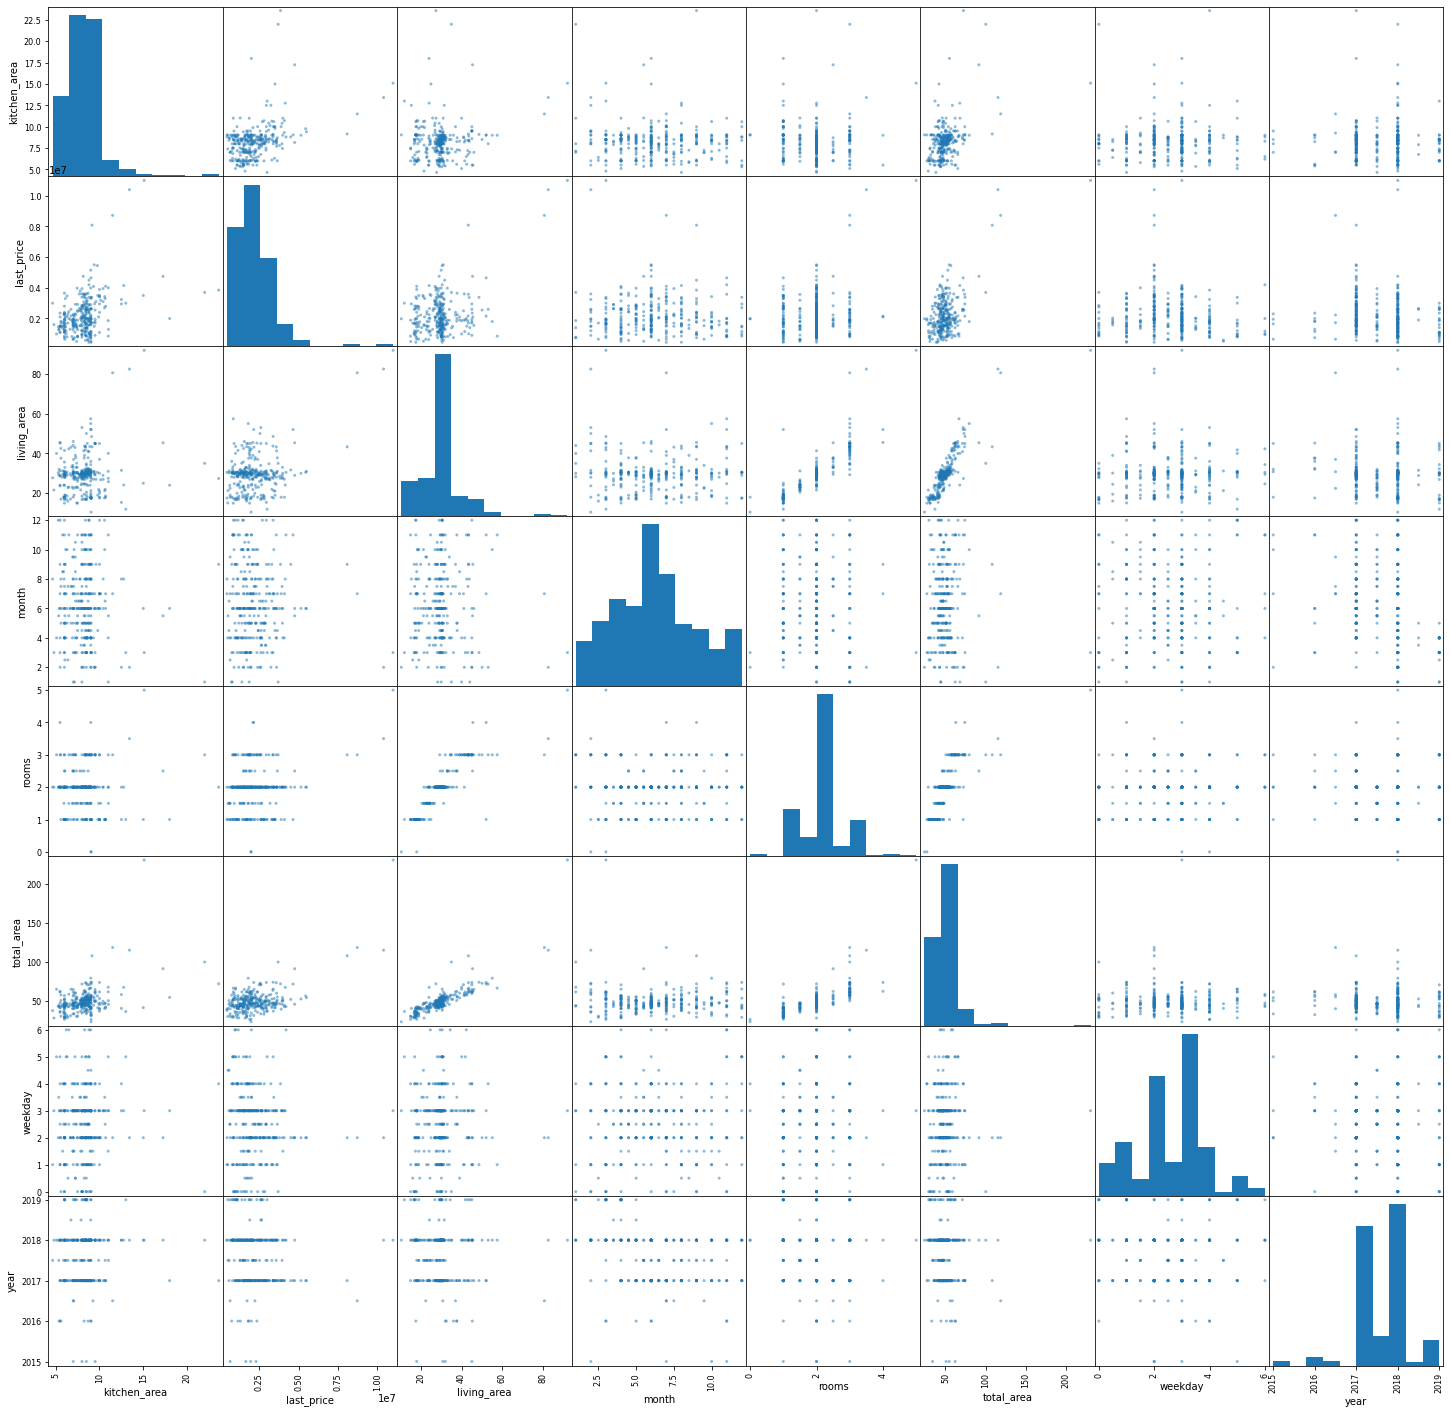

In [ ]:
#Задание
#"Какие факторы больше всего влияют на общую (полную) стоимость объекта?
#Постройте графики, которые покажут зависимость цены от указанных ниже параметров.
#Для подготовки данных перед визуализацией вы можете использовать сводные таблицы."
#- общей площади; - жилой площади; - площади кухни; - количество комнат;
#- типа этажа, на котором расположена квартира (первый, последний, другой);
#- даты размещения (день недели, месяц, год);

#print(data_clr.info()) #вывод информации о data
dapiv_price=data_clr.pivot_table(index='locality_name',values=['last_price','total_area','living_area','kitchen_area','rooms','num_floor','weekday','year','month'],aggfunc='median')
#print(dapiv_totarea_price) # вывод сводной таблицы по total area и last price
print(dapiv_price.corr())
pd.plotting.scatter_matrix(dapiv_price, figsize=(25,25) )
plt.show()

         Среднеарифметическое значение цены по выборке
weekday                                               
0                                         6.039232e+06
1                                         6.016708e+06
2                                         6.064191e+06
3                                         6.308646e+06
4                                         5.966782e+06
5                                         5.906791e+06
6                                         5.876572e+06
         Кол-во продаж для каждого дня недели
weekday                                      
0                                        3570
1                                        4131
2                                        3922
3                                        4227
4                                        3951
5                                        1911
6                                        1677
AxesSubplot(0.125,0.125;0.775x0.755)


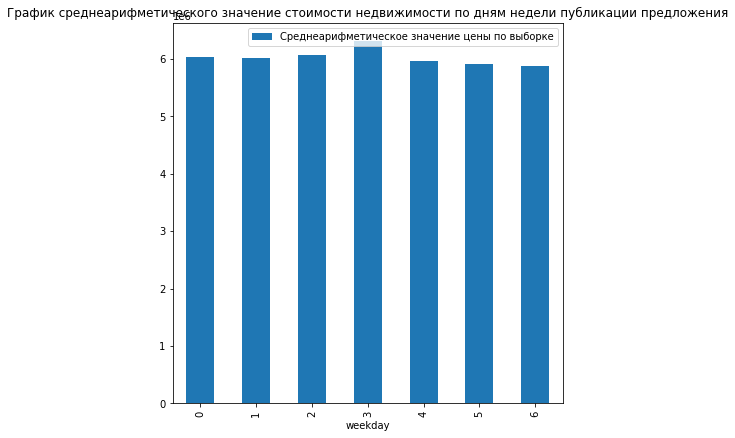

AxesSubplot(0.125,0.125;0.775x0.755)


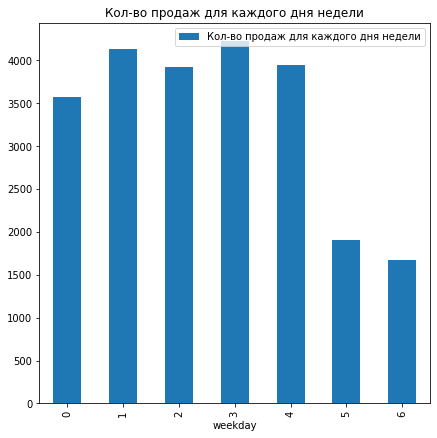

In [ ]:
#построение сводной таблицы для типа дня недели
pivot_day=data_clr.pivot_table(index='weekday', values=['total_area'],aggfunc=['count'])
pivot_numday=data_clr.pivot_table(index='weekday', values=['last_price'],aggfunc=['mean'])
pivot_numday.columns=['Среднеарифметическое значение цены по выборке']
pivot_day.columns=['Кол-во продаж для каждого дня недели']
print(pivot_numday)
print(pivot_day)

print(pivot_numday.plot(y='Среднеарифметическое значение цены по выборке', kind='bar', figsize=(7,7),title='График среднеарифметического значение стоимости недвижимости по дням недели публикации предложения'))
plt.show()
print(pivot_day.plot(y='Кол-во продаж для каждого дня недели', kind='bar', figsize=(7,7),title='Кол-во продаж для каждого дня недели'))
plt.show()

**Вывод** Исходя из графика, стоимость квартиры практически не отличается в зависимости от дня недели публикации. Есть небольшое увеличение стоимости по предложениям размещенные в четверг, но с учетом значения этого "всплеска", предлагается остановится на выводе о том, что день недели не влияет на стоимость.  
При этом чаще всего предложения публиковались во вторник и четверг, и резкий спад обнаружен на субботу и воскресенье (вероятно потому что у риелторов тоже есть выходные)

      Среднеарифметическое значение цены по выборке
year                                               
2014                                   1.142043e+07
2015                                   7.813909e+06
2016                                   6.180301e+06
2017                                   5.965111e+06
2018                                   5.671290e+06
2019                                   6.350781e+06
      Кол-во продаж для каждого года
year                                
2014                             134
2015                            1150
2016                            2737
2017                            8084
2018                            8437
2019                            2847
AxesSubplot(0.125,0.125;0.775x0.755)


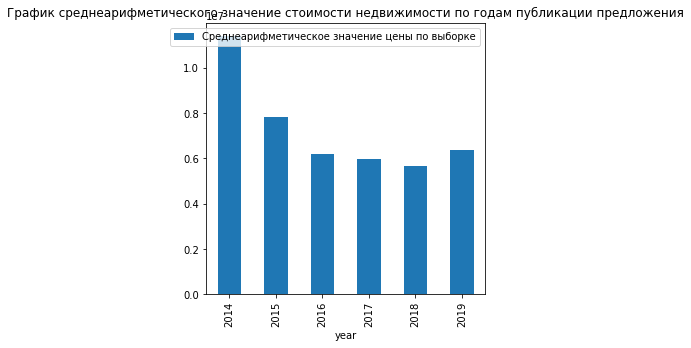

AxesSubplot(0.125,0.125;0.775x0.755)


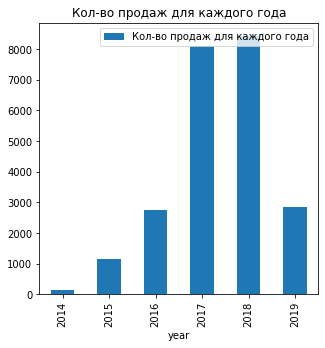

In [ ]:
#построение сводной таблицы для типа месяцев
pivot_year=data_clr.pivot_table(index='year', values=['total_area'],aggfunc=['count'])
pivot_numyear=data_clr.pivot_table(index='year', values=['last_price'],aggfunc=['mean'])
pivot_numyear.columns=['Среднеарифметическое значение цены по выборке']
pivot_year.columns=['Кол-во продаж для каждого года']
print(pivot_numyear)
print(pivot_year)

print(pivot_numyear.plot(y='Среднеарифметическое значение цены по выборке', kind='bar', figsize=(5,5),title='График среднеарифметического значение стоимости недвижимости по годам публикации предложения'))
plt.show()
print(pivot_year.plot(y='Кол-во продаж для каждого года', kind='bar', figsize=(5,5),title='Кол-во продаж для каждого года'))
plt.show()

**Вывод** Исходя из графика, наибольшая стоимость сделок зафиксирована в 2014 году, при этом, как видно из графика ниже, кол-в опредложений было ниже. С 2015 по 2018 включительно стоимость сделок падала, при этом на графике ниже видно, что в 2017-2018 был пик сделок. И резкий спад как по цене, так и по количеству сделок пришёлся на 2019 год (сказался экономический кризис).

       Среднеарифметическое значение цены по выборке
month                                               
1                                       6.058129e+06
2                                       6.077360e+06
3                                       5.835147e+06
4                                       5.995374e+06
5                                       6.072333e+06
6                                       5.894291e+06
7                                       6.106125e+06
8                                       6.304791e+06
9                                       6.189688e+06
10                                      5.847528e+06
11                                      6.133212e+06
12                                      6.258210e+06
       Кол-во продаж для каждого месяца
month                                  
1                                  1472
2                                  2614
3                                  2546
4                                  2348
5                 

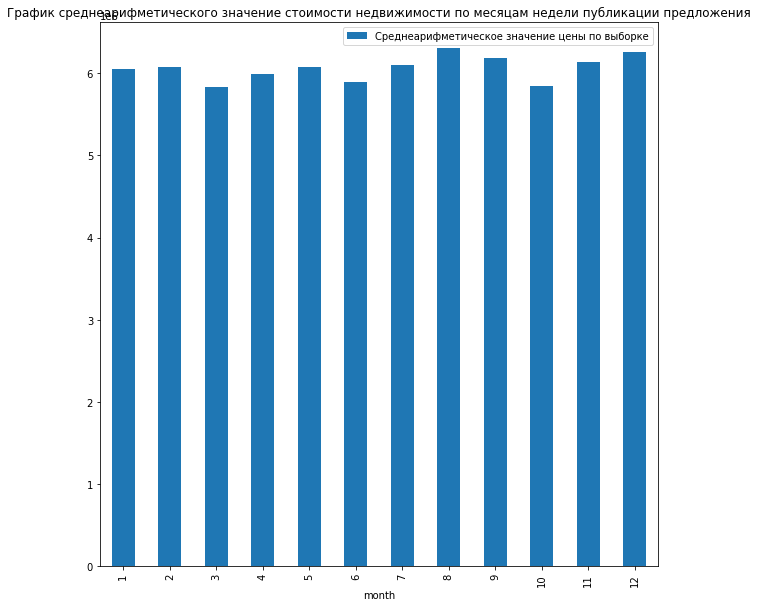

AxesSubplot(0.125,0.125;0.775x0.755)


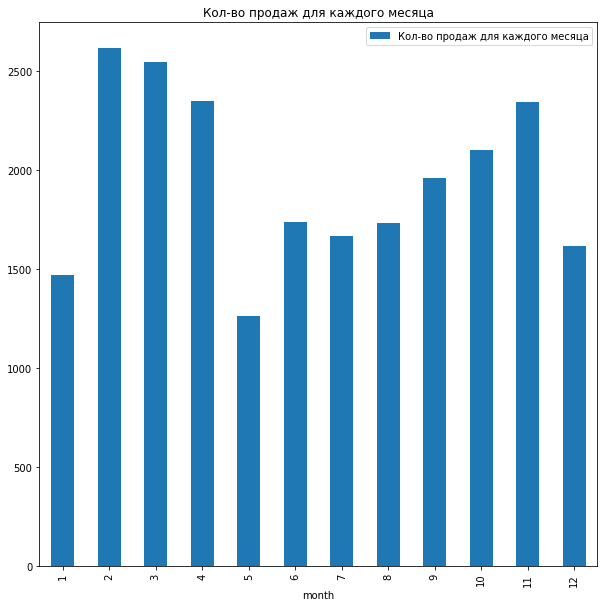

In [ ]:
#построение графиков для года
pivot_month=data_clr.pivot_table(index='month', values=['total_area'],aggfunc=['count'])
pivot_nummonth=data_clr.pivot_table(index='month', values=['last_price'],aggfunc=['mean'])
pivot_nummonth.columns=['Среднеарифметическое значение цены по выборке']
pivot_month.columns=['Кол-во продаж для каждого месяца']
print(pivot_nummonth)
print(pivot_month)

print(pivot_nummonth.plot(y='Среднеарифметическое значение цены по выборке', kind='bar', figsize=(10,10),title='График среднеарифметического значение стоимости недвижимости по месяцам недели публикации предложения'))
plt.show()
print(pivot_month.plot(y='Кол-во продаж для каждого месяца', kind='bar', figsize=(10,10),title='Кол-во продаж для каждого месяца'))
plt.show()

**Вывод** Исходя из графика, аналогично графику с днями недели, стоимость почти не изменяется в зависимости от месяца размещения. При этом, максимальное значение приходится на 8 и 12 месяцы и минимальные на 3 и 10 месяцы. При сравнении максимальных и минимальных показателей разница может быть небольшой (до 500 т.р.).  
Чаще всего публиковались в феврале и в ноябре. Спады в мае явно связаны с праздниками и выходными (небольшие спады с июля-август можно объяснить сезоном отпуска).
Пиковые значения обусловлены началом года (январь-также полон праздников, поэтому предложений немного) и концом года (в декабре множество людей берут отпуска либо предпочтитают отложить оформление и проведение сделки на следующий год)

             kitchen_area  living_area  rooms  total_area
last_price                                               
12190.0             40.50       32.000    2.0      109.00
430000.0             7.40       23.250    1.5       42.20
440000.0             9.04       17.600    1.0       40.00
450000.0             7.15       26.650    2.0       40.25
470000.0             9.00       28.000    1.0       41.00
...                   ...          ...    ...         ...
124350000.0         23.00      131.000    4.0      248.70
125000000.0         30.00      163.500    4.0      224.50
130000000.0         12.00      148.000    6.0      231.00
140000000.0         15.10       91.785    5.0      241.00
159984000.0         20.00      131.000    4.0      242.40

[2883 rows x 4 columns]
AxesSubplot(0.125,0.125;0.775x0.755)


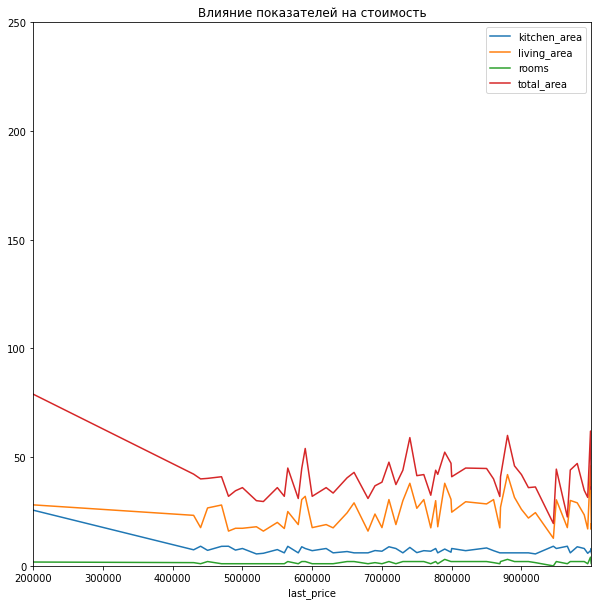

In [ ]:
#построение таблицы с медианными значениями факторов
dapivprice=data_clr.pivot_table(index='last_price',values=['total_area','living_area','kitchen_area','rooms','num_floor'],aggfunc='median')
print(dapivprice) # вывод сводной таблицы по total area и last price
print(dapivprice.plot(title='Влияние показателей на стоимость',ylim=(0,250),xlim = (200000,999999),figsize=(10,10)))

           last_price
num_floor            
Другой      4800000.0
Первый      3900000.0
Последний   4280000.0
AxesSubplot(0.125,0.125;0.775x0.755)


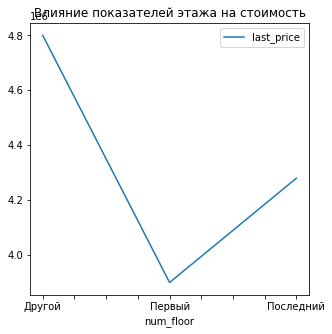

In [ ]:
#создание сводной таблицы и графика для оценки взаимосвязи last_price и num_floor
pivot_floorprice=data_clr.pivot_table(index='num_floor', values='last_price',aggfunc='median')
print(pivot_floorprice)
print(pivot_floorprice.plot(title='Влияние показателей этажа на стоимость',figsize=(5,5)))

**Вывод**
Исходя из представленных данных на стоимость сделки оказывают сильное влияние показатели площадей (общей, кухни и жилой). Прямая зависимость между показателями. Количество комнат оказывает незначительное влияние на стоимость недвижимости.
Параметры времени, такие как день недели не оказывает значительного влияния на стоимость. При этом год и месяц сильно оказывает влияение на стоимость (в разрезе месяца влияние небольшое, при этом в разрезе года - связь значительная).
При этом обнаружено, что стоимость недвижимости на первом этаже ниже чем стоимость на последнем этаже, и значительно ниже чем на других этажах.

In [ ]:
#Ранее вы посчитали расстояние до центра в километрах.
#Теперь выделите квартиры в Санкт-Петербурге с помощью столбца locality_name и вычислите среднюю цену каждого километра.
#Опишите, как стоимость объектов зависит от расстояния до центра города.
data_spb=data_clr.query('locality_name=="Санкт-Петербург"')
data_spb['price_for_1_km']=data_spb['last_price']/data_spb['total_area']
new_spb=data_spb.loc[:,['km_cityCenters','price_for_1_km']].sort_values(by='km_cityCenters',ascending=True)
new_spb_piv=new_spb.pivot_table(index='km_cityCenters', values='price_for_1_km', aggfunc='median')
new_spb_piv1=new_spb.pivot_table(index='km_cityCenters', values='price_for_1_km', aggfunc='mean')
print(new_spb.head(15))
print(new_spb_piv.head(15))
print(new_spb_piv1.head(15))

       km_cityCenters  price_for_1_km
13896             0.0   503875.968992
8662              0.0   137755.102041
2289              0.0   155529.953917
9472              0.0    75471.698113
10359             0.0   440000.000000
13753             0.0   188888.888889
13671             0.0   195591.194969
8225              0.0   139318.885449
2606              0.0    90000.000000
2984              0.0   108163.265306
1933              0.0    88796.296296
1181              0.0   172619.047619
12537             0.0   110357.583231
21991             0.0   100000.000000
5509              0.0    75135.135135
                price_for_1_km
km_cityCenters                
0.0              144957.983193
1.0              127441.176471
2.0              119178.082192
3.0              107783.783784
4.0              117541.806020
5.0              126628.151261
6.0              129449.838188
7.0              125095.685456
8.0              122549.019608
9.0              105764.119601
10.0             106

AxesSubplot(0.125,0.125;0.775x0.755)
AxesSubplot(0.125,0.125;0.775x0.755)


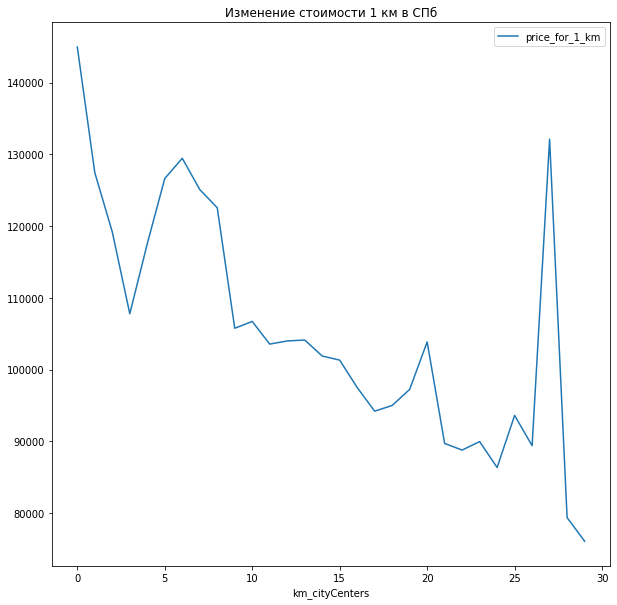

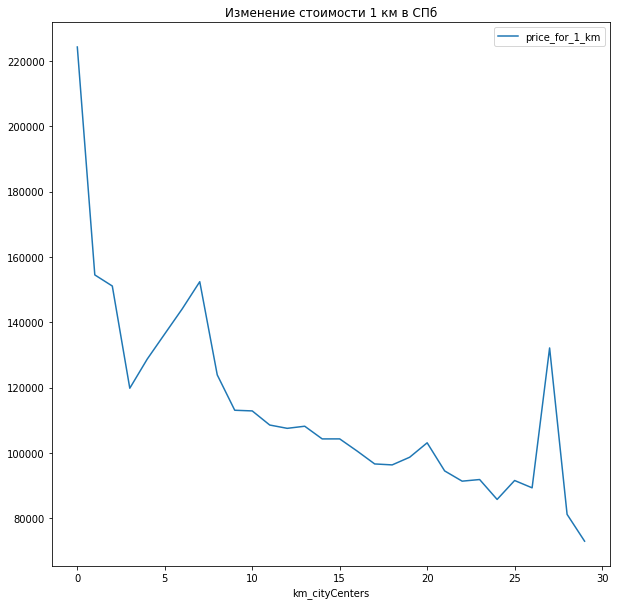

In [ ]:
print(new_spb_piv.plot(y='price_for_1_km',figsize=(10,10), title='Изменение стоимости 1 км в СПб'))
#вывод графика стоимости каждого км. от центра в СПб по медианным значениям стоимости каждого км в предложениях
print(new_spb_piv1.plot(y='price_for_1_km',figsize=(10,10), title='Изменение стоимости 1 км в СПб'))
#вывод графика стоимости каждого км. от центра в СПб по ср.арифметическим значениям стоимости каждого км в предложениях

**Вывод** Исходя из графика наиболее дорогая недвижимость (высокая стоимость за кв.м.) приходится на недвижимость расположенная в радиусе 5 км( однако имеется пик на расстоянии 3 км. Исходя из данных карт по СПб в этом радиусе находятся в основном либо пятиэтажки старого типа, либо новостройки с низкой ценой). С 5 по 25 в целом тренд на снижение стоимости (чем дальше - тем дешевле). Отмечается при этом небольшой пик на расстоянии 25 км. (вероятно наличие дорогостоящих частных домов). И имеется пик, сопоставимый со значениями на 5 км., на расстоянии 27 км от центра(на картах обнаружено большое количество дорогой недвижимости в т.ч. в районе Стрельна, например).

При этом, при анализе двух графиков по медианным и по ср.арифметическим данным, обнаружено:
1. средняя арифметическая стоимость выше чем медианная (значит выборка не равномерна и имеются "выбросы" в виде очень дорогих квартир, или очень дешевых на одном расстоянии, в зависимости от локации)
2. средняя арифметичекая сильно сглаживает данные и явные небольшие пики почти "расстворяются"
Данное исследование подчеркивает, что для наглядности лучше применить медианную величину.

In [ ]:
# соединение таблиц
dc_pivot_local
data_clr_spb=data_clr.merge(dc_pivot_local, on='locality_name', how='left')

In [ ]:
data_clr_spb=data_clr.merge(new_spb_piv, on='km_cityCenters', how='left')
display(data_clr_spb.sort_values(by='km_cityCenters').head(5)) # вывод проверка таблицы
data_clr_spb.corr()

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,ponds_around3000,ponds_nearest,days_exposition,price_one_m,weekday,month,year,num_floor,km_cityCenters,price_for_1_km
9365,3,8000000.0,106.0,2018-07-26,3,3.40,4,45.0,1,False,...,2.0,38.0,60.0,75471.698113,3,7,2018,Первый,0.0,144957.983193
1164,1,5800000.0,33.6,2016-03-10,1,3.70,7,22.8,4,False,...,3.0,503.0,167.0,172619.047619,3,3,2016,Другой,0.0,144957.983193
12399,3,17900000.0,162.2,2017-10-16,5,3.60,5,101.0,3,False,...,2.0,516.0,380.0,110357.583231,0,10,2017,Другой,0.0,144957.983193
1910,18,9590000.0,108.0,2017-05-23,2,3.30,5,59.0,2,False,...,3.0,290.0,69.0,88796.296296,1,5,2017,Другой,0.0,144957.983193
13744,12,65000000.0,129.0,2017-09-25,3,2.65,6,72.0,5,False,...,3.0,569.0,13.0,503875.968992,0,9,2017,Другой,0.0,144957.983193


,total_images,last_price,total_area,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,studio,...,parks_nearest,ponds_around3000,ponds_nearest,days_exposition,price_one_m,weekday,month,year,km_cityCenters,price_for_1_km
total_images,1.000000,0.129275,0.117100,0.095789,0.040933,0.012550,0.103283,0.031026,0.013187,-0.028440,...,0.012331,-0.017271,-0.015011,-0.031372,0.130768,-0.010687,0.004937,0.142747,-0.043902,0.005191
last_price,0.129275,1.000000,0.724658,0.442290,0.375178,0.027253,0.609062,0.044818,0.028227,-0.040976,...,0.115447,0.205050,0.040613,0.115398,0.751595,-0.005608,0.009545,-0.056734,-0.299393,0.376752
total_area,0.117100,0.724658,1.000000,0.793650,0.398817,-0.061886,0.916343,-0.026401,0.016980,-0.088023,...,0.092863,0.167149,0.044145,0.161270,0.246273,-0.010656,0.007260,-0.088949,-0.242068,0.333079
rooms,0.095789,0.442290,0.793650,1.000000,0.227329,-0.226049,0.877242,-0.155281,-0.001906,-0.153692,...,0.052982,0.084632,0.018074,0.120689,0.003909,-0.004150,-0.004446,-0.053533,-0.174592,0.241795
ceiling_height,0.040933,0.375178,0.398817,0.227329,1.000000,-0.066678,0.354467,-0.038289,0.050317,0.007369,...,0.095731,0.186592,0.042171,0.103852,0.290958,-0.023716,-0.007765,-0.051195,-0.297972,0.383935
floors_total,0.012550,0.027253,-0.061886,-0.226049,-0.066678,1.000000,-0.172933,0.674299,-0.022525,0.069804,...,-0.124283,-0.119018,-0.038611,-0.049349,0.192642,0.012207,0.017051,0.006811,0.009341,-0.261773
living_area,0.103283,0.609062,0.916343,0.877242,0.354467,-0.172933,1.000000,-0.109888,0.012366,-0.064507,...,0.075535,0.138726,0.037741,0.143675,0.137491,-0.008731,-0.002018,-0.076137,-0.226039,0.310081
floor,0.031026,0.044818,-0.026401,-0.155281,-0.038289,0.674299,-0.109888,1.000000,-0.012378,0.037189,...,-0.077607,-0.074104,-0.021320,-0.038140,0.156292,0.011553,0.019340,0.004991,0.005507,-0.167783
is_apartment,0.013187,0.028227,0.016980,-0.001906,0.050317,-0.022525,0.012366,-0.012378,1.000000,-0.003385,...,-0.017571,0.019550,0.018654,0.006319,0.035827,-0.010654,-0.001113,0.015967,0.011276,-0.008821
studio,-0.028440,-0.040976,-0.088023,-0.153692,0.007369,0.069804,-0.064507,0.037189,-0.003385,1.000000,...,-0.019925,-0.000278,0.007143,-0.021960,0.020694,-0.001251,0.000871,0.011962,-0.007151,-0.004659


**Вывод**
Исходя из графика очевидно, что стоимость каждого км. от центра резко снижается со значения 2 км и дальше. Так, например, стоимость "расстояния" в 0 км. (т.е. недвижимость находится в самом "эпицентре" составляет 42316 р., но уже на 2 км - 4882 р.
При этом, исходя из данных таблицы, стоимость сделки имеет прямую связь с параметром стоимости "1 км." (чем ближе к центру-тем дороже).

### Общий вывод

В начале исследования были поставлены следующие задачи:
Задачи:

Подготовить данные, проанализировать на предмет пропусков (определить, какие данные нужны - заполнить пропуски, какие данные могут не понадобится -пропуски можно оставить, либо, если пропусков много-данные удалить).  
**Ответ:** в исходных данных обнаружены пропуски в ceiling_height высота потолков (м), floors_total (всего этажей в доме), living_area (жилая площадь в квадратных метрах (м²)), is_apartment (апартаменты ли) , kitchen_area (площадь кухни в квадратных метрах (м²)) , balcony (кол-во балконов), locality_name (наименование города/поселения и т.д. нахождения квартиры) , airports_nearest (расстояние до ближайшего аэропорта в метрах (м)), cityCenters_nearest (расстояние до центра города), parks_around3000 (число парков в радиусе 3 км) , parks_nearest (расстояние до ближайшего парка) , ponds_around3000 (число водоёмов в радиусе 3 км) , ponds_nearest (расстояние до ближайшего пруда), days_exposition (сколько дней было размещено объявление (от публикации до снятия)).
Пропуски в ceiling_height могли быть по причине незаполнения данных пользователем (например, эта информация не обязательна к размещению) или по причине технической ошибки. При этом, пропусков много и удалять такое кол-во данных - потерять чуть менее половины data. Пропуски можно заполнить на основе локации (как правило в городах строят однотипные дома, в которых одиннаковые\максимально приближенные параметры)
Пропуски в floors_total могут быть обусловлены либо человеческим фактором (например, эта информация не обязательна к размещению), либо дом частный и информация не была указана осознанно (дом частный с 1 этажом), либо техническая ошибка. Возможно заполнить данные медианными значениями по data (в основном анализируются города с многоэтажными домами). При этом, кол-во пропусков не так много, и в общем случае можно избавится от данных с этими пропусками.
Пропуски в living_area явно были утеряны по причине технического характера (маловероятно, что эта информация не была обязательна к заполнению). Такую информацию можно заполнить по кол-ву комнат (логично, что чем больше площадь - тем больше комнат). Данных пропусков немного, но, т.к. данные параметр один из важных (в целом изучение стоимости квартиры предположительно напрямую зависит от кв.м.), удалять такие строки непредпочтительно.
Пропуски в is_apartment возникли явно по причине того, что при заполнении информации пользователем недвижимость не являлась апартаментами, и данную информацию просто пропустили. Предлагается заполнить пропуски значением False (так как использовались булевые значения т.е. либо True либо False). Удалять такие данные с пропусками нельзя, т.к. это почти весь data.
В части kitchen_area - ситуация аналогична с living_area и ее предлагается заполнить по такому же принципу.
В части пропусков с balcony ситуация аналогична с is_apartment. Данные пропуски предлагается заполнить значением 0, т.к. если значения не указаны - значит балконов нет. Удалять данные также нельзя - это почти половина data.
Пропуски с locality_name маловероятно получится восстановить. От этих данных можно избавится, так как их крайне мало относительно всего data.
Данные по airports_nearest (расстояние до ближайшего аэропорта в метрах (м)), cityCenters_nearest (расстояние до центра города), parks_around3000 (число парков в радиусе 3 км) , parks_nearest (расстояние до ближайшего парка) , ponds_around3000 (число водоёмов в радиусе 3 км) , ponds_nearest (расстояние до ближайшего пруда), можно частично заполнить. Например, если не указана значение по ponds_around3000 (указано 0), то и parks_nearest можно присвоить значение 0 (парков нет рядом в целом). Такие данные явно не обязательны к заполнению пользователем. Было бы логичнее, чтобы такие данные "подтягивались" в зависимоти от адреса недвижимости автоматически( но это не является предметом этого исследования).
Данные по days_exposition (сколько дней было размещено объявление (от публикации до снятия)) маловероятно можно заполнить. В разных ситуациях по разному продавались квартиры (в целом, недвижимость разная, ситуации разные, описание разное). Заполнять такую информацию медианной или средней заполнять представляется нецелесообразным.

Помимо прочего, данные по first_day_exposition можно преобразовать в тип datetime, а данные по floors_total и floor - в значения int. При этом, данные в которых явно могут быть значения int (days_exposition) преобразовать в этот тип преобращовать невозможно, так как в данном столбце есть пропуски Nan (которые имеют тип float).
Причины по которым данные были изначально записаны в "странных" типах, могут быть либо технические (форма сама предполагает запись не 5 а 5.0). В части записи даты - вероятно технически не была предусмотрена форма, которая интерпретировала введенные значения в формате datetime, а записывала как в формате str.

Определить, сколько обычно занимает продажа. Какие продажи можно считать быстрыми, а какие — необычно долгими?"   
**Ответ:** Из анализа значений кол-во дней показов предложения (days_exposition), можно сделать вывод, что в среднем сделки с недвижимостью занимают около полугода (медиана приходится на 179 дней). При этом имеются "всплески" 40 и 60 дней (что является быстрыми продажами).Исходя из таблицы и графика, случаи продажи квартиры более 2 лет, в целом, можно считать крайне специфичными. При этом, считать их аномальными преждевременно, вероятно наличие множество субъективных факторов.

Определить какие факторы больше всего влияют на общую (полную) стоимость объекта?    
**Ответ:**
У показателя стоимости имеется высокая прямая связь с показателем площади (total_area), жилой площади (living_area) и комнат (rooms), т.е. чем больше площадь-тем выше стоимость. При этом наблюдается небольшая обратная связь с показателем расстояния до центра(km_cityCenters), т.е. чем дальше от центра - тем дешевле стоимость недвижимости.

Исходя из графика наиболее дорогая недвижимость (высокая стоимость за кв.м.) приходится на недвижимость расположенная в радиусе 5 км( однако имеется пик на расстоянии 3 км. Исходя из данных карт по СПб в этом радиусе находятся в основном либо пятиэтажки старого типа, либо новостройки с низкой ценой). С 5 по 25 в целом тренд на снижение стоимости (чем дальше - тем дешевле). Отмечается при этом небольшой пик на расстоянии 25 км. (вероятно наличие дорогостоящих частных домов). И имеется пик, сопоставимый со значениями на 5 км., на расстоянии 27 км от центра(на картах обнаружено большое количество дорогой недвижимости в т.ч. в районе Стрельна, например).

Стоимость квартиры практически не отличается в зависимости от дня недели публикации. Есть небольшое увеличение стоимости по предложениям размещенные в четверг, но с учетом значения этого "всплеска", предлагается остановится на выводе о том, что день недели не влияет на стоимость.
При этом чаще всего предложения публиковались во вторник и четверг, и резкий спад обнаружен на субботу и воскресенье (вероятно потому что у риелторов тоже есть выходные)
Аналогично графику с днями недели, стоимость почти не изменяется в зависимости от месяца размещения. При этом, максимальное значение приходится на 8 и 12 месяцы и минимальные на 3 и 10 месяцы. При сравнении максимальных и минимальных показателей разница может быть небольшой (до 500 т.р.).
Чаще всего публиковались в феврале и в ноябре. Спады в мае явно связаны с праздниками и выходными (небольшие спады с июля-август можно объяснить сезоном отпуска). Пиковые значения обусловлены началом года (январь-также полон праздников, поэтому предложений немного) и концом года (в декабре множество людей берут отпуска либо предпочтитают отложить оформление и проведение сделки на следующий год)
Набольшая стоимость сделок зафиксирована в 2014 году, при этом, как видно из графика ниже, кол-в опредложений было ниже. С 2015 по 2018 включительно стоимость сделок падала, при этом на графике ниже видно, что в 2017-2018 был пик сделок. И резкий спад как по цене, так и по количеству сделок пришёлся на 2019 год (сказался экономический кризис). Т.е. продавать недвижимость в 2014 году было выгоднее чем в 2019, например.

Большинство предложений недвижимости включали в себя жилую площадь примерно 35-50 кв.м., что, исходя из практики, соответствует однокомнатным и двухкомнатным квартирам (и исходя из графиков, именно таких типов квартир, больше всего в выборке и больше всего продаж с такими квартирами). В основном, высота потолков соответствует стандартным 2,6-2,75 м. (исключениями могут быть частные дома, либо квартиры с высокими потолками около 3 м.) Данный показатель имеет прямую связь с общей площадью (total_area) (частный дом мб большим по площади и, соответственно иметь высокие потолки, например). В основном в выборке присутствуют предложения недвижимости расположенные с 0 по 5 этаж (пик) и в целом большая часть предложений находится до 10 этажа. В целом, реже всего предложений недвижимости на первом этаже, чуть больше предложений на крайнем этаже. Большая часть предложений - на "других" этажах. В основном наибольшее предложение недвижимости от 5 до 20 км от центра. Из таблицы корреляции видно, что у показателя есть небольшая связь с показателем высоты потолков (например, чем дальше от центра, ближе к области, имеются частные дома с высокими потолками с показателями общей площади (аналогично с примером с потолками) и с показателем цены (чем дальше от центра, тем дешевле недвижимость).

Несмотря на высокие показатели значения наличия парков/водоемов на выборку, в выборке слишком много пропусков, чтобы однозначно заявлять о сильной зависимости показателя стоимости от показателя расстояния (в целом наличия) парков/водоемов.

При анализе выявлено, что в среднем в значении "Другой" подразумевается 5 этаж, под "Последним" - 7 и выше. При этом в выборке больше всего предложений по типу "Другой". Доля "Первый" и "Последний" гораздо меньше и примерно на одном уровне (по кол-ву предложений). При этом, наиболее дорогие предложения расположены на "Другом" этаже, самый дешёвый вариант на "Первом" этаже и менее дешевле "Другого" является предложения на "Последнем этаже".

Посчитайте среднюю цену одного квадратного метра в 10 населённых пунктах с наибольшим числом объявлений. Выделите населённые пункты с самой высокой и низкой стоимостью квадратного метра. Эти данные можно найти по имени в столбце locality_name.  
**Ответ**  
Исходя из данных таблицы видно, что наибольшее кол-во преложений приходится на Санкт-Петербург, где средняя стоимость 1 кв.м. составляет 100594 руб., что немногим выше средней цены за 1 кв. без учета местности (103248 руб.). На втором месте находятся локации Мурино, Кудрово, Пушкин и Парголово где стоимость 1 кв.м. немногим ниже чем в СПб. При этом, кол-во предложений в СПб почти в три раза превышает кол-во предложений Мурино, которое находится на 2ом месте по кол-ву предложений. В целом, сравнение таких данных представляется некорректным, т.к. во-первых, очевидно, что в густонаселенном городе предложений недвижимости больше и стоимость недвижимости больше, сравнительно от аналогичных предложений в области (городах с меньшей численностью населения), во-вторых, кол-во предложений по локациям несопоставимо, и огромная возможность искажения результатов в зависимости от выборки.

Выделить квартиры в Санкт-Петербурге с помощью столбца locality_name и вычислите среднюю цену каждого километра. Опишите, как стоимость объектов зависит от расстояния до центра города.  
**Ответ**  
Исходя из графика наиболее дорогая недвижимость (высокая стоимость за кв.м.) приходится на недвижимость расположенная в радиусе 5 км( однако имеется пик на расстоянии 3 км. Исходя из данных карт по СПб в этом радиусе находятся в основном либо пятиэтажки старого типа, либо новостройки с низкой ценой). С 5 по 25 в целом тренд на снижение стоимости (чем дальше - тем дешевле). Отмечается при этом небольшой пик на расстоянии 25 км. (вероятно наличие дорогостоящих частных домов). И имеется пик, сопоставимый со значениями на 5 км., на расстоянии 27 км от центра(на картах обнаружено большое количество дорогой недвижимости в т.ч. в районе Стрельна, например).

Цель "определить набор параметров имеющие связь/влияние на определение рыночной стоимости недвижимости (какие параметры реально коррелируют с параметром стоимости)" достигнута.

**Чек-лист готовности проекта**

Поставьте 'x' в выполненных пунктах. Далее нажмите Shift+Enter.

- [x]  открыт файл
- [x]  файлы изучены (выведены первые строки, метод `info()`, гистограммы и т.д.)
- [x]  определены пропущенные значения
- [x]  заполнены пропущенные значения там, где это возможно
- [x]  есть пояснение, какие пропущенные значения обнаружены
- [x]  изменены типы данных
- [x]  есть пояснение, в каких столбцах изменены типы и почему
- [x]  устранены неявные дубликаты в названиях населённых пунктов
- [x]  устранены редкие и выбивающиеся значения (аномалии) во всех столбцах
- [x]  посчитано и добавлено в таблицу: цена одного квадратного метра
- [x]  посчитано и добавлено в таблицу: день публикации объявления (0 - понедельник, 1 - вторник и т.д.)
- [x]  посчитано и добавлено в таблицу: месяц публикации объявления
- [x]  посчитано и добавлено в таблицу: год публикации объявления
- [x]  посчитано и добавлено в таблицу: тип этажа квартиры (значения — «первый», «последний», «другой»)
- [x]  посчитано и добавлено в таблицу: расстояние в км до центра города
- [x]  изучены и описаны следующие параметры:
        - общая площадь;
        - жилая площадь;
        - площадь кухни;
        - цена объекта;
        - количество комнат;
        - высота потолков;
        - этаж квартиры;
        - тип этажа квартиры («первый», «последний», «другой»);
        - общее количество этажей в доме;
        - расстояние до центра города в метрах;
        - расстояние до ближайшего аэропорта;
        - расстояние до ближайшего парка;
        - день и месяц публикации объявления
- [x]  построены гистограммы для каждого параметра
- [x]  выполнено задание: "Изучите, как быстро продавались квартиры (столбец days_exposition). Этот параметр показывает, сколько дней «висело» каждое объявление.
    - Постройте гистограмму.
    - Посчитайте среднее и медиану.
    - В ячейке типа markdown опишите, сколько обычно занимает продажа. Какие продажи можно считать быстрыми, а какие — необычно долгими?"
- [x]  выполнено задание: "Какие факторы больше всего влияют на общую (полную) стоимость объекта? Постройте графики, которые покажут зависимость цены от указанных ниже параметров. Для подготовки данных перед визуализацией вы можете использовать сводные таблицы."
        - общей площади;
        - жилой площади;
        - площади кухни;
        - количество комнат;
        - типа этажа, на котором расположена квартира (первый, последний, другой);
        - даты размещения (день недели, месяц, год);
- [x]  выполнено задание: "Посчитайте среднюю цену одного квадратного метра в 10 населённых пунктах с наибольшим числом объявлений. Выделите населённые пункты с самой высокой и низкой стоимостью квадратного метра. Эти данные можно найти по имени в столбце `locality_name`."
- [x]  выполнено задание: "Ранее вы посчитали расстояние до центра в километрах. Теперь выделите квартиры в Санкт-Петербурге с помощью столбца `locality_name` и вычислите среднюю цену каждого километра. Опишите, как стоимость объектов зависит от расстояния до центра города."
- [x]  в каждом этапе есть промежуточные выводы
- [x]  есть общий вывод